In [ ]:
#Importing of the required Libraries for EDA.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from ast import literal_eval

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("https://github.com/Debasish-Rath93/Lead-Scoring-Case-Study/raw/main/Leads.csv")

In [ ]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [ ]:
df.shape

(9240, 37)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
#Check percentage of null values
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [ ]:
#Drop Columns with more than 35% null
nulls = df.isnull().mean()*100
cols_to_drop = nulls[nulls > 35].index.tolist()
df = df.drop(columns=cols_to_drop)

In [ ]:
#Check percentage of null values
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [ ]:
df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [ ]:
#Let us check Specialization
df.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [ ]:
#Replace Select with Null and check
df.replace('Select', np.nan, inplace=True)

In [ ]:
#Check percentage of null values
df.isnull().mean()*100


Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [ ]:
#Drop Columns with more than 35% null
nulls = df.isnull().mean()*100
cols_to_drop = nulls[nulls > 35].index.tolist()
df = df.drop(columns=cols_to_drop)

In [ ]:
#Check percentage of null values
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [ ]:
#CHECK CURRENT OCCUPATION
df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [ ]:
#Fill the null values of the column with other
df["What is your current occupation"] = df["What is your current occupation"].fillna('Other')

In [ ]:
df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [ ]:
#Fill the null values of the column with other
df["What matters most to you in choosing a course"] = df["What matters most to you in choosing a course"].fillna('Other')

In [ ]:
#Check percentage of null values
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [ ]:
#DROP COUNTRY COLUMN AS ITS NOT POSSIBLE TO IMPUTE
df = df.drop(columns=['Country'])

In [ ]:
#Drop all rows with null values
df = df.dropna()

In [ ]:
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [ ]:
#REPLACE ALL YES WITH 1 AND ALL NO WITH 0
df = df.replace({'Yes':1 , 'No':0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   int64  
 5   Do Not Call                                    9074 non-null   int64  
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [ ]:
#DROP PROSPECT ID AND LEAD NUMBER
df = df.drop(columns=['Prospect ID' , 'Lead Number'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   int64  
 3   Do Not Call                                    9074 non-null   int64  
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   What is your current occupation                9074 

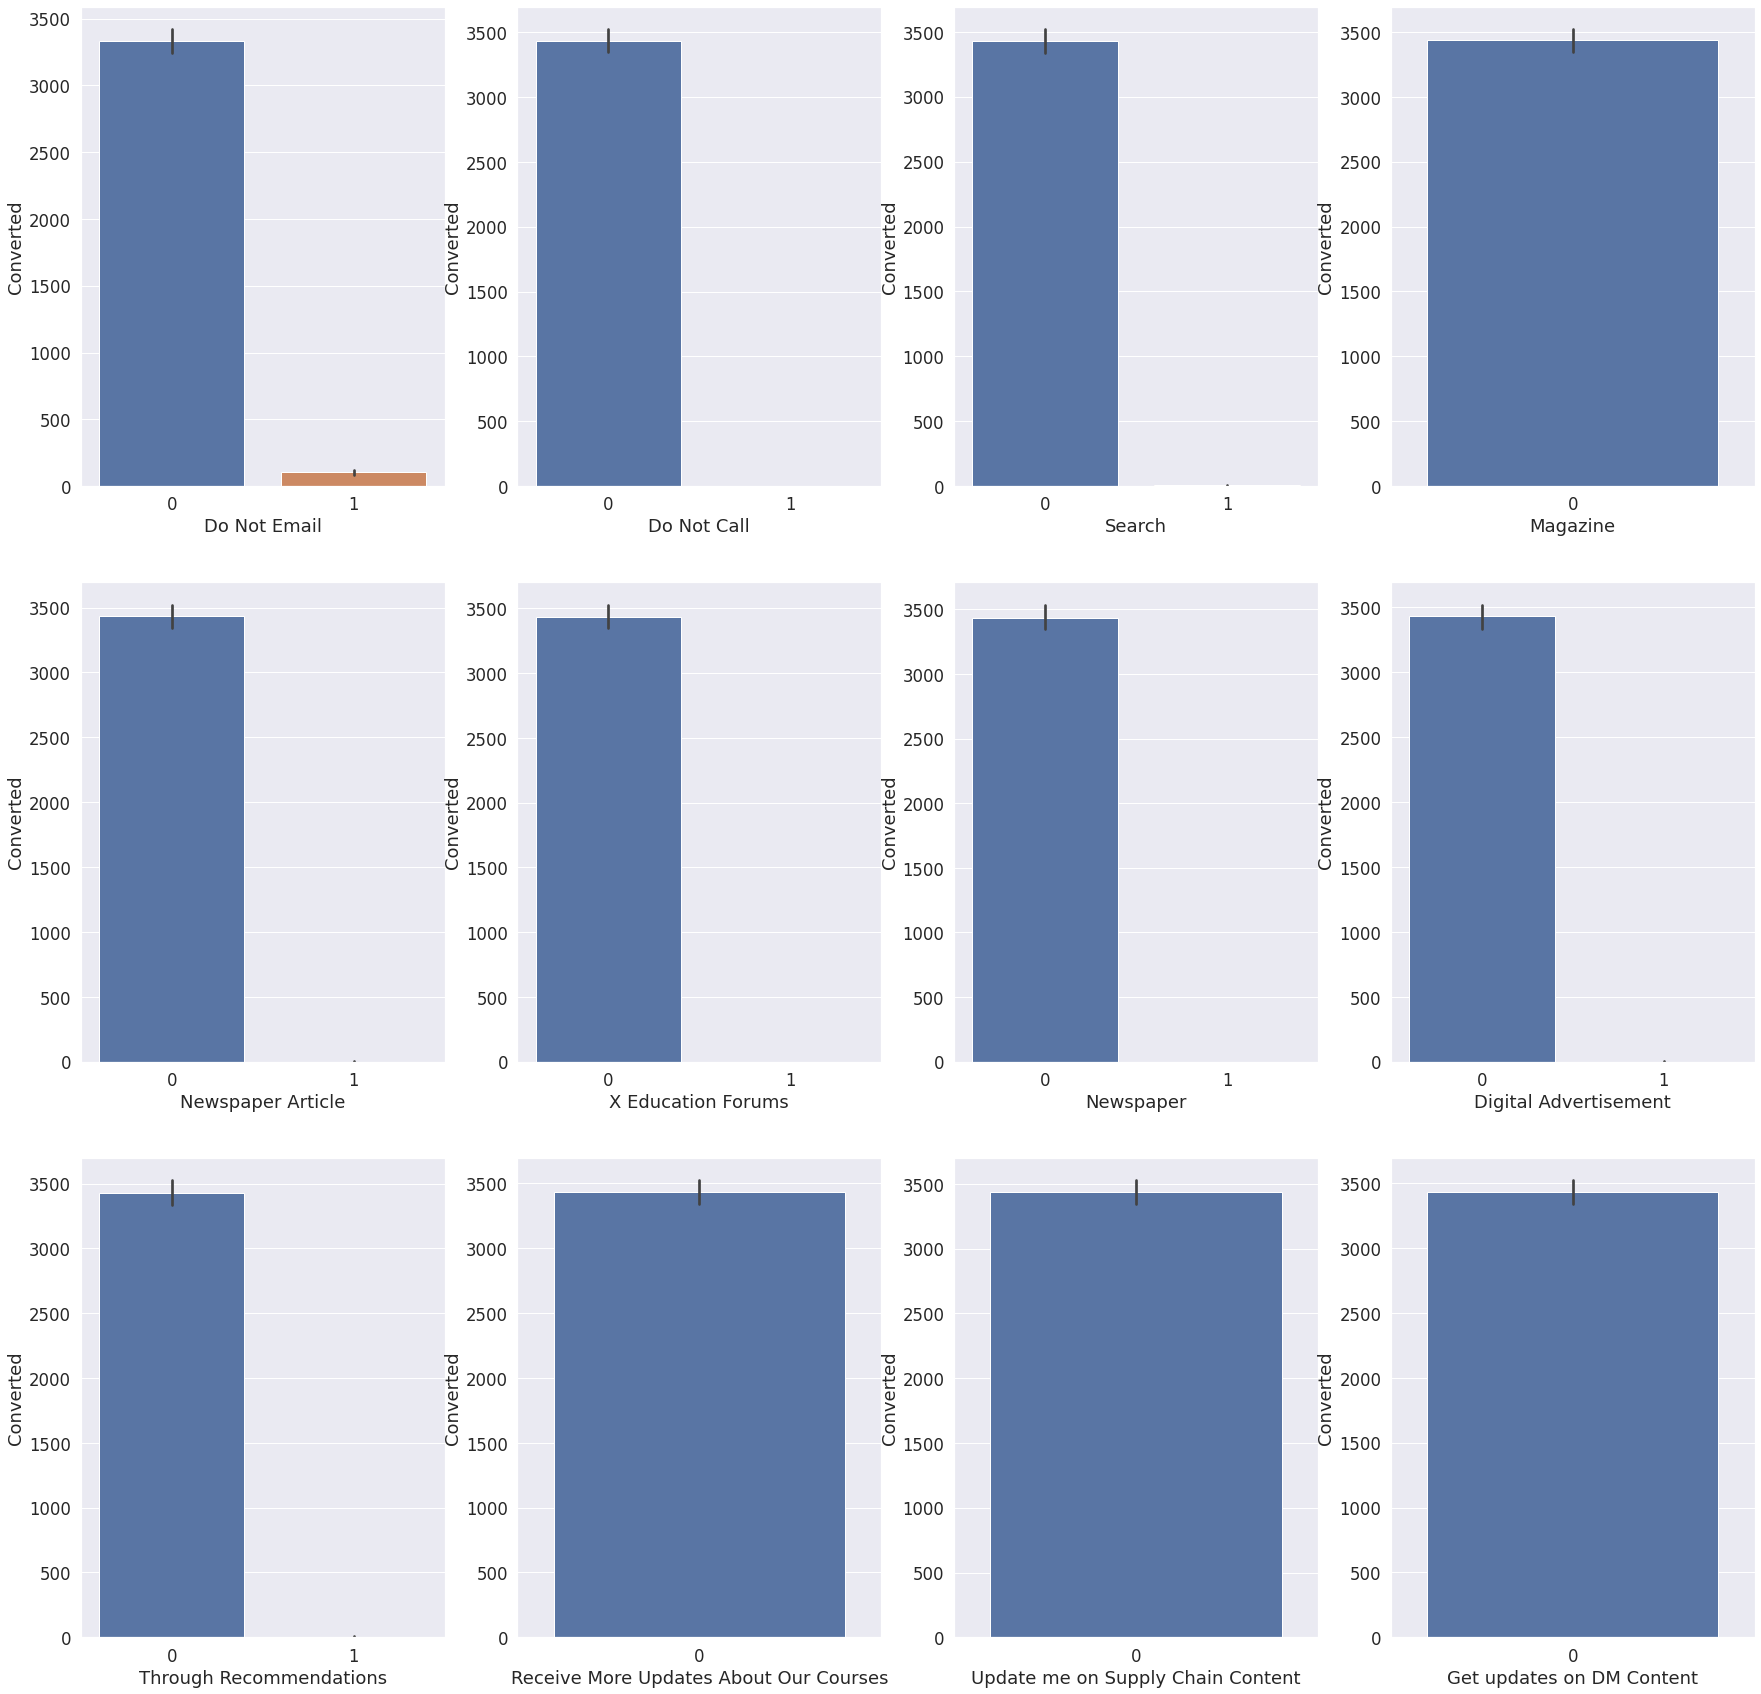

In [ ]:
plt.figure(figsize=(30, 30))
plt.subplot(3,4,1)
sns.barplot(x='Do Not Email', y='Converted', data=df, estimator=sum)
plt.subplot(3,4,2)
sns.barplot(x='Do Not Call', y='Converted', data=df, estimator=sum)
plt.subplot(3,4,3)
sns.barplot(x='Search', y='Converted', data=df, estimator=sum)
plt.subplot(3,4,4)
sns.barplot(x='Magazine', y='Converted', data=df, estimator=sum)
plt.subplot(3,4,5)
sns.barplot(x='Newspaper Article', y='Converted', data=df, estimator=sum)
plt.subplot(3,4,6)
sns.barplot(x='X Education Forums', y='Converted', data=df, estimator=sum)
plt.subplot(3,4,7)
sns.barplot(x='Newspaper', y='Converted', data=df, estimator=sum)
plt.subplot(3,4,8)
sns.barplot(x='Digital Advertisement', y='Converted', data=df, estimator=sum)
plt.subplot(3,4,9)
sns.barplot(x='Through Recommendations', y='Converted', data=df, estimator=sum)
plt.subplot(3,4,10)
sns.barplot(x='Receive More Updates About Our Courses', y='Converted', data=df, estimator=sum)
plt.subplot(3,4,11)
sns.barplot(x='Update me on Supply Chain Content', y='Converted', data=df, estimator=sum)
plt.subplot(3,4,12)
sns.barplot(x='Get updates on DM Content', y='Converted', data=df, estimator=sum)
plt.show()

In [ ]:
#REMOVE COLUMNS WITH SAME VALUES
distinct_counts = df.nunique()
df = df.loc[:, distinct_counts != 1]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   int64  
 3   Do Not Call                                    9074 non-null   int64  
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   What is your current occupation                9074 

In [ ]:
df.nunique()

Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
A free copy of Mastering The Interview              2
Last Notable Activity       

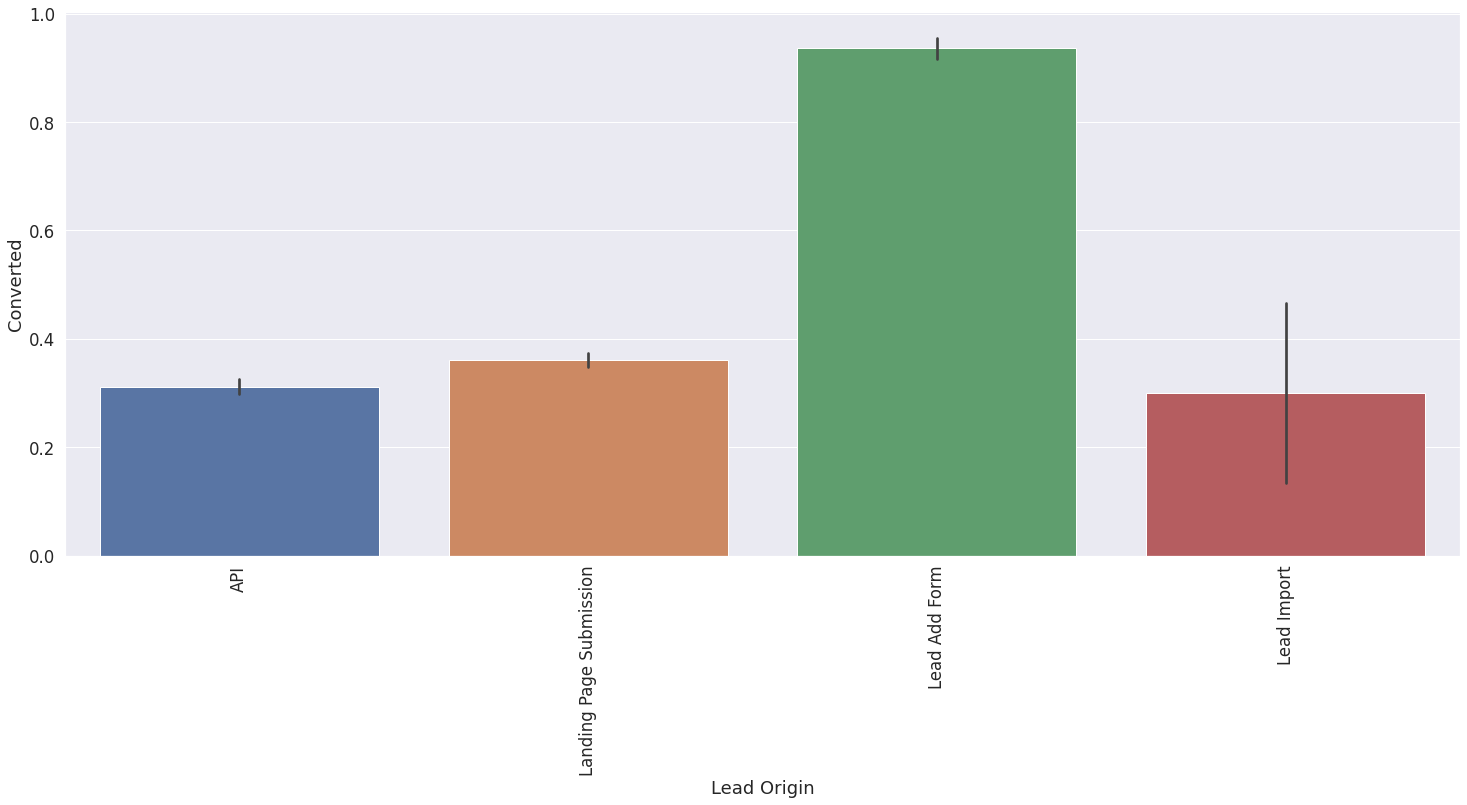

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=[25,10])
sns.barplot(x='Lead Origin', y='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

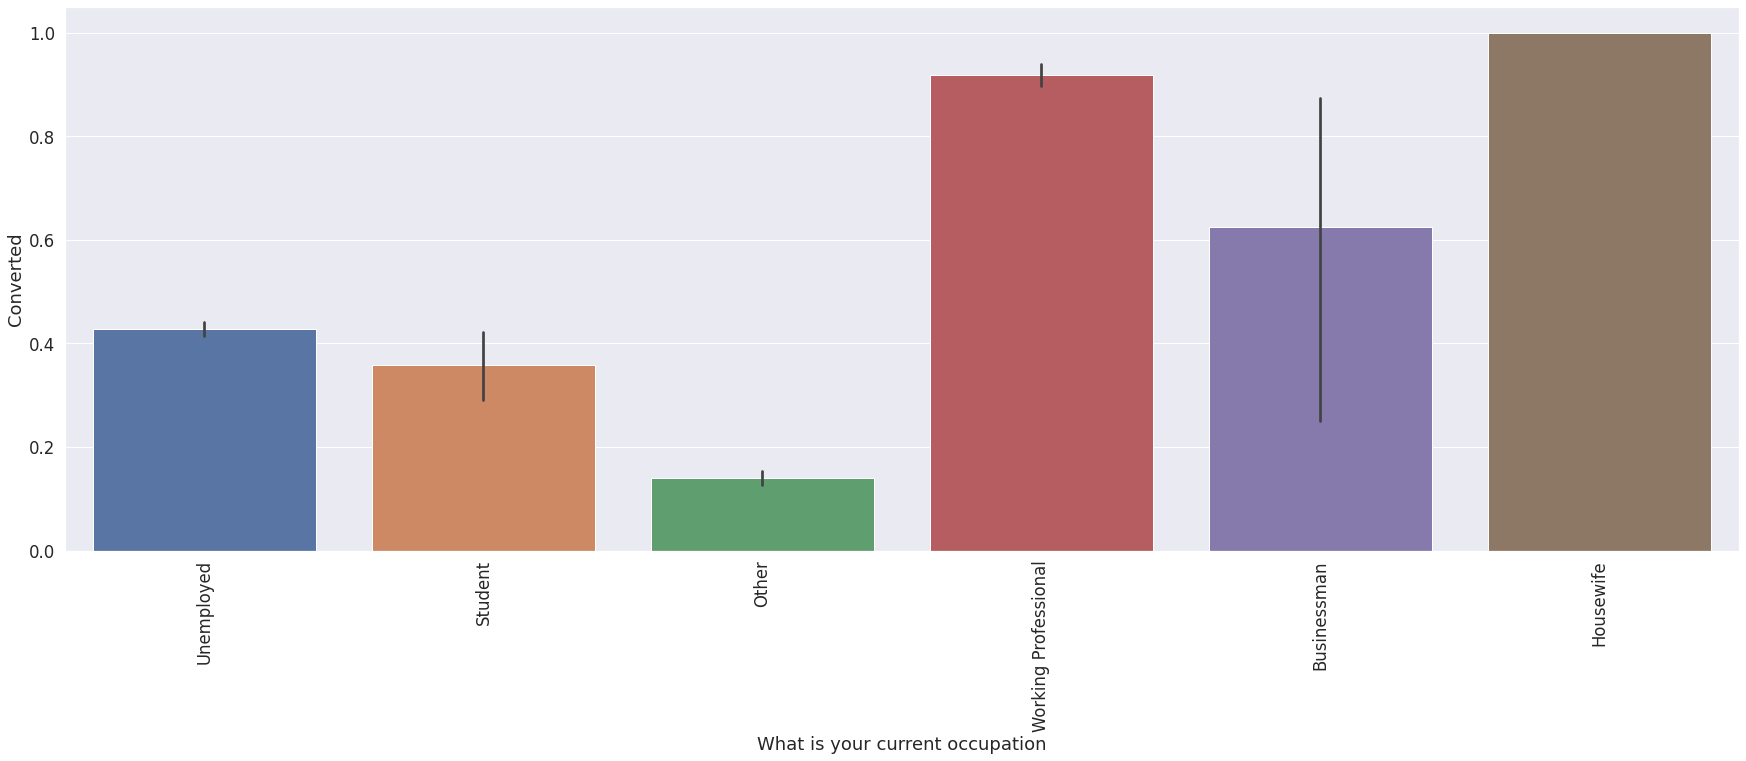

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=[30,10])
sns.barplot(x='What is your current occupation', y='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

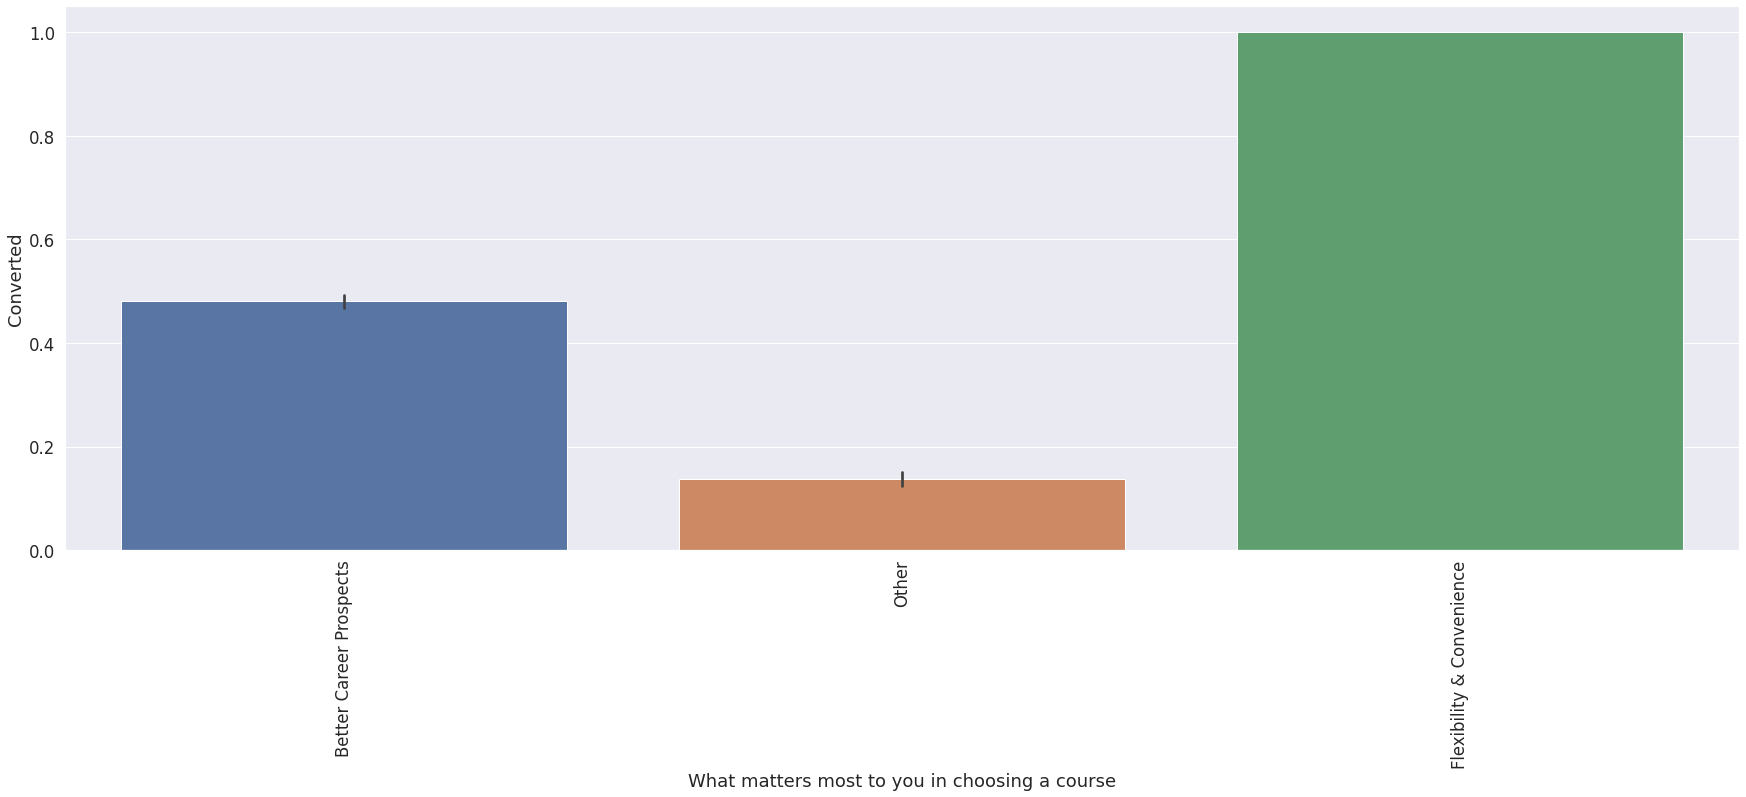

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=[30,10])
sns.barplot(x='What matters most to you in choosing a course', y='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

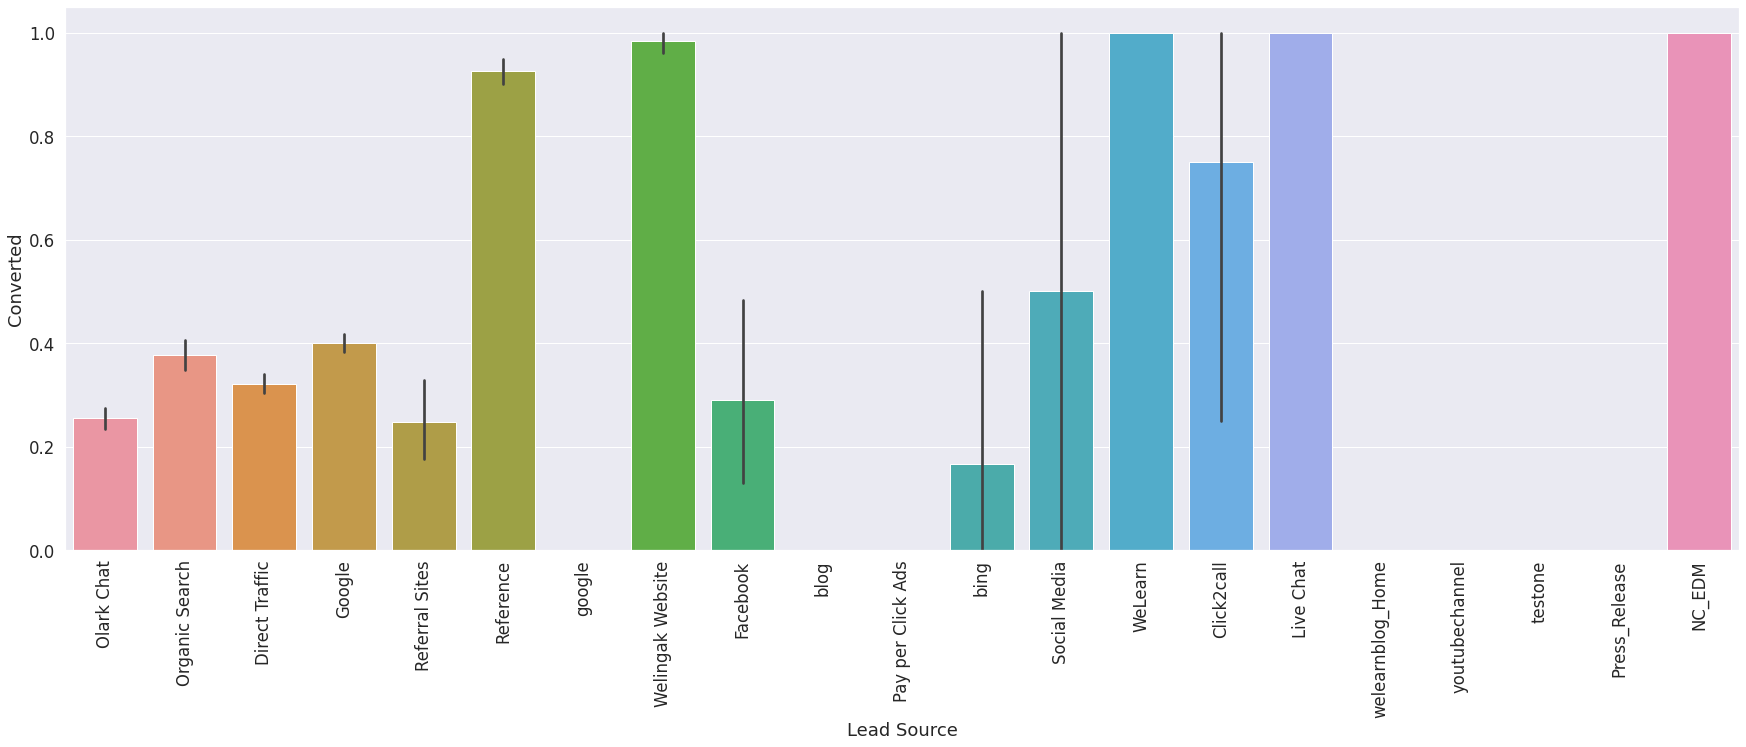

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=[30,10])
sns.barplot(x='Lead Source', y='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

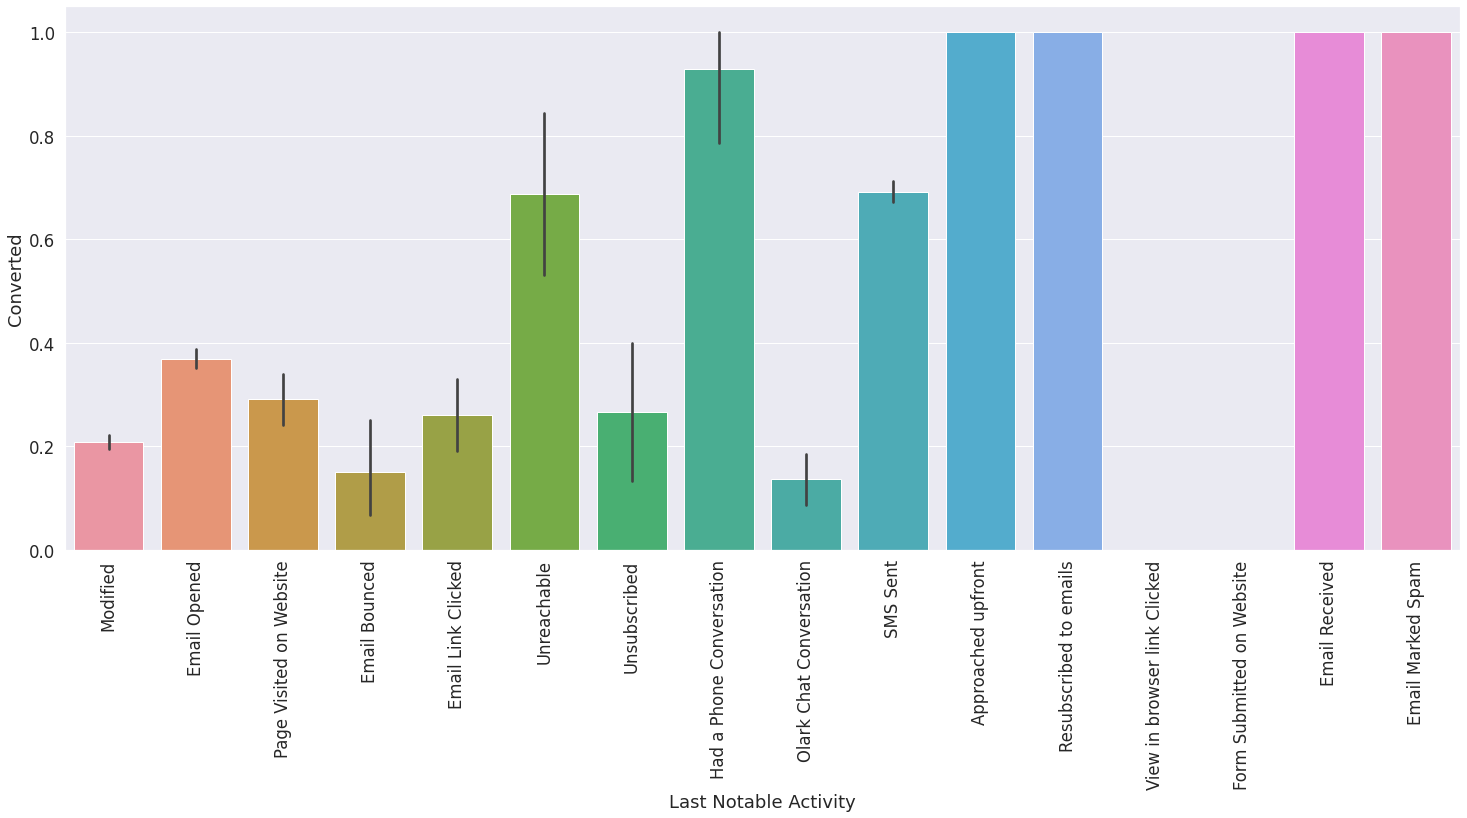

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=[25,10])
sns.barplot(x='Last Notable Activity', y='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

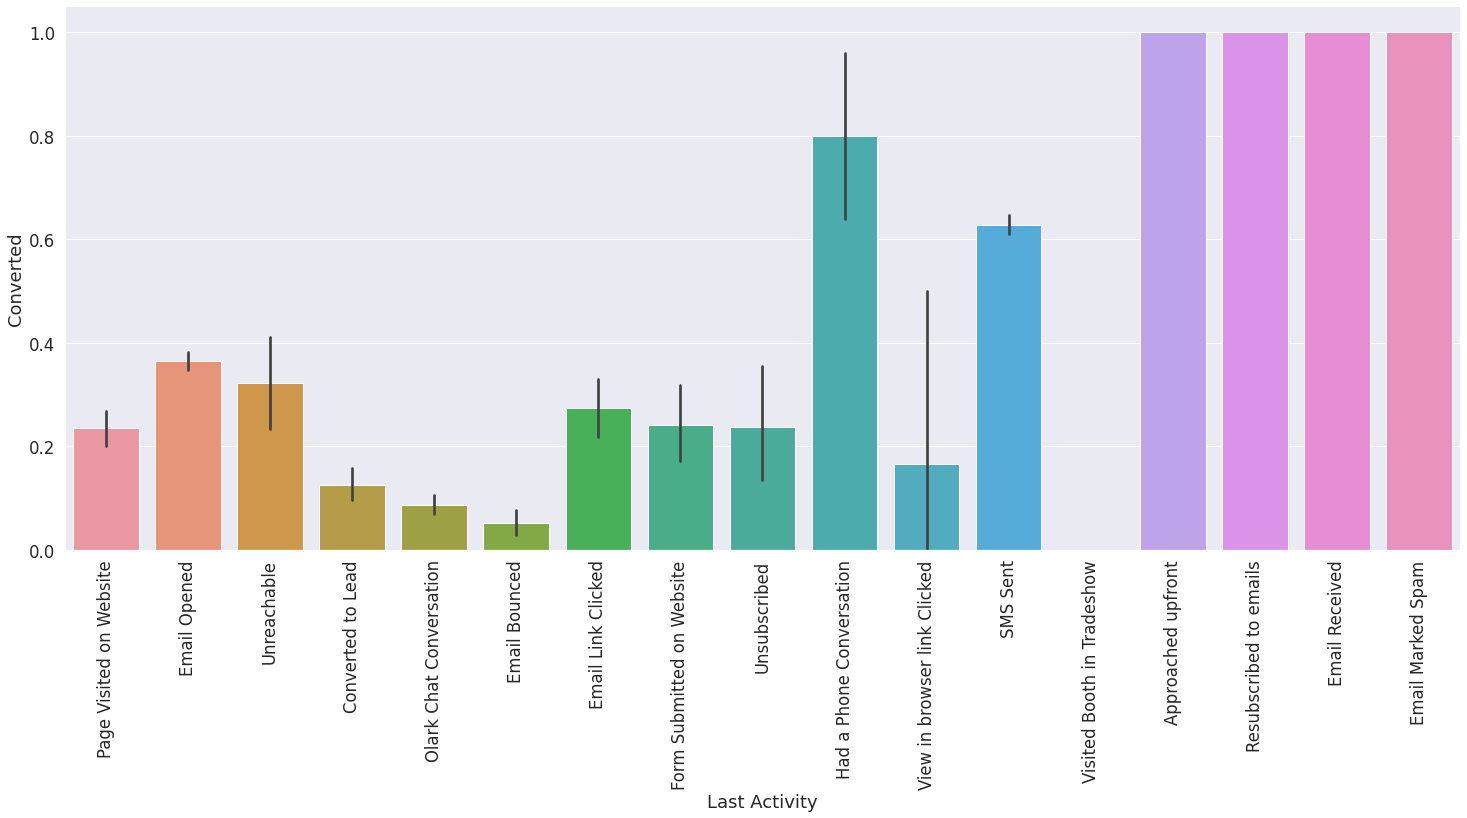

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=[25,10])
sns.barplot(x='Last Activity', y='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#DUMMY VARIABLES


In [ ]:
#Get Dummy variables for 'Lead Origin' and store it in a new variable "LeadsOrigins"
LeadsOrigins = pd.get_dummies(df["Lead Origin"])
LeadsOrigins.head()

API  Landing Page Submission  Lead Add Form  Lead Import
0    1                        0              0            0
1    1                        0              0            0
2    0                        1              0            0
3    0                        1              0            0
4    0                        1              0            0

In [ ]:
# Add the results to the original dataframe

df = pd.concat([df, LeadsOrigins], axis = 1)

In [ ]:
df.drop(['Lead Origin'], axis = 1, inplace = True)

In [ ]:
#Get Dummy variables for 'Lead Origin' and store it in a new variable "Occupation"
Occupation = pd.get_dummies(df["What is your current occupation"],prefix='Occupation')
Occupation.head()

Occupation_Businessman  Occupation_Housewife  Occupation_Other  \
0                       0                     0                 0   
1                       0                     0                 0   
2                       0                     0                 0   
3                       0                     0                 0   
4                       0                     0                 0   

   Occupation_Student  Occupation_Unemployed  Occupation_Working Professional  
0                   0                      1                                0  
1                   0                      1                                0  
2                   1                      0                                0  
3                   0                      1                                0  
4                   0                      1                                0

In [ ]:
# Add the results to the original dataframe

df = pd.concat([df, Occupation], axis = 1)

In [ ]:
df.drop(['What is your current occupation'], axis = 1, inplace = True)

In [ ]:
#Get Dummy variables for What matters most to you in choosing a course to Choosing
Choosing = pd.get_dummies(df['What matters most to you in choosing a course'],prefix='Matters')
Choosing.head()

Matters_Better Career Prospects  Matters_Flexibility & Convenience  \
0                                1                                  0   
1                                1                                  0   
2                                1                                  0   
3                                1                                  0   
4                                1                                  0   

   Matters_Other  
0              0  
1              0  
2              0  
3              0  
4              0

In [ ]:
# Add the results to the original dataframe

df = pd.concat([df, Choosing], axis = 1)

In [ ]:
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [ ]:
#Get Dummy variables for What matters most to you in choosing a course to Choosing
LS = pd.get_dummies(df['Lead Source'],prefix='Source')
LS.head()

Source_Click2call  Source_Direct Traffic  Source_Facebook  Source_Google  \
0                  0                      0                0              0   
1                  0                      0                0              0   
2                  0                      1                0              0   
3                  0                      1                0              0   
4                  0                      0                0              1   

   Source_Live Chat  Source_NC_EDM  Source_Olark Chat  Source_Organic Search  \
0                 0              0                  1                      0   
1                 0              0                  0                      1   
2                 0              0                  0                      0   
3                 0              0                  0                      0   
4                 0              0                  0                      0   

   Source_Pay per Click Ads  Source_Press_Release  Source_Reference  \
0                         0                     0                 0   
1                         0                     0                 0   
2                         0                     0                 0   
3                         0                     0                 0   
4                         0                     0                 0   

   Source_Referral Sites  Source_Social Media  Source_WeLearn  \
0                      0                    0               0   
1                      0                    0               0   
2                      0                    0               0   
3                      0                    0               0   
4                      0                    0               0   

   Source_Welingak Website  Source_bing  Source_blog  Source_google  \
0                        0            0            0              0   
1                        0            0            0              0   
2                        0            0            0              0   
3                        0            0            0              0   
4                        0            0            0              0   

   Source_testone  Source_welearnblog_Home  Source_youtubechannel  
0               0                        0                      0  
1               0                        0                      0  
2               0                        0                      0  
3               0                        0                      0  
4               0                        0                      0

In [ ]:
# Add the results to the original dataframe

df = pd.concat([df, LS], axis = 1)

In [ ]:
df.drop(['Lead Source'], axis = 1, inplace = True)

In [ ]:
#Get Dummy variables for What matters most to you in choosing a course to Choosing
LNA = pd.get_dummies(df['Last Notable Activity'])
LNA.head()

Approached upfront  Email Bounced  Email Link Clicked  Email Marked Spam  \
0                   0              0                   0                  0   
1                   0              0                   0                  0   
2                   0              0                   0                  0   
3                   0              0                   0                  0   
4                   0              0                   0                  0   

   Email Opened  Email Received  Form Submitted on Website  \
0             0               0                          0   
1             1               0                          0   
2             1               0                          0   
3             0               0                          0   
4             0               0                          0   

   Had a Phone Conversation  Modified  Olark Chat Conversation  \
0                         0         1                        0   
1                         0         0                        0   
2                         0         0                        0   
3                         0         1                        0   
4                         0         1                        0   

   Page Visited on Website  Resubscribed to emails  SMS Sent  Unreachable  \
0                        0                       0         0            0   
1                        0                       0         0            0   
2                        0                       0         0            0   
3                        0                       0         0            0   
4                        0                       0         0            0   

   Unsubscribed  View in browser link Clicked  
0             0                             0  
1             0                             0  
2             0                             0  
3             0                             0  
4             0                             0

In [ ]:
# Add the results to the original dataframe

df = pd.concat([df, LNA], axis = 1)

In [ ]:
df.drop(['Last Notable Activity'], axis = 1, inplace = True)

In [ ]:
#Get Dummy variables for What matters most to you in choosing a course to Choosing
LA = pd.get_dummies(df['Last Activity'],prefix='Activity')
LA.head()

Activity_Approached upfront  Activity_Converted to Lead  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           1   

   Activity_Email Bounced  Activity_Email Link Clicked  \
0                       0                            0   
1                       0                            0   
2                       0                            0   
3                       0                            0   
4                       0                            0   

   Activity_Email Marked Spam  Activity_Email Opened  Activity_Email Received  \
0                           0                      0                        0   
1                           0                      1                        0   
2                           0                      1                        0   
3                           0                      0                        0   
4                           0                      0                        0   

   Activity_Form Submitted on Website  Activity_Had a Phone Conversation  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0                                  0   
3                                   0                                  0   
4                                   0                                  0   

   Activity_Olark Chat Conversation  Activity_Page Visited on Website  \
0                                 0                                 1   
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4                                 0                                 0   

   Activity_Resubscribed to emails  Activity_SMS Sent  Activity_Unreachable  \
0                                0                  0                     0   
1                                0                  0                     0   
2                                0                  0                     0   
3                                0                  0                     1   
4                                0                  0                     0   

   Activity_Unsubscribed  Activity_View in browser link Clicked  \
0                      0                                      0   
1                      0                                      0   
2                      0                                      0   
3                      0                                      0   
4                      0                                      0   

   Activity_Visited Booth in Tradeshow  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0

In [ ]:
# Add the results to the original dataframe

df = pd.concat([df, LA], axis = 1)

In [ ]:
df.drop(['Last Activity'], axis = 1, inplace = True)

In [ ]:
df.shape

(9074, 80)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 80 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Do Not Email                            9074 non-null   int64  
 1   Do Not Call                             9074 non-null   int64  
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Search                                  9074 non-null   int64  
 7   Newspaper Article                       9074 non-null   int64  
 8   X Education Forums                      9074 non-null   int64  
 9   Newspaper                               9074 non-null   int64  
 10  Digital Advertisement                   9074 non-null   int6

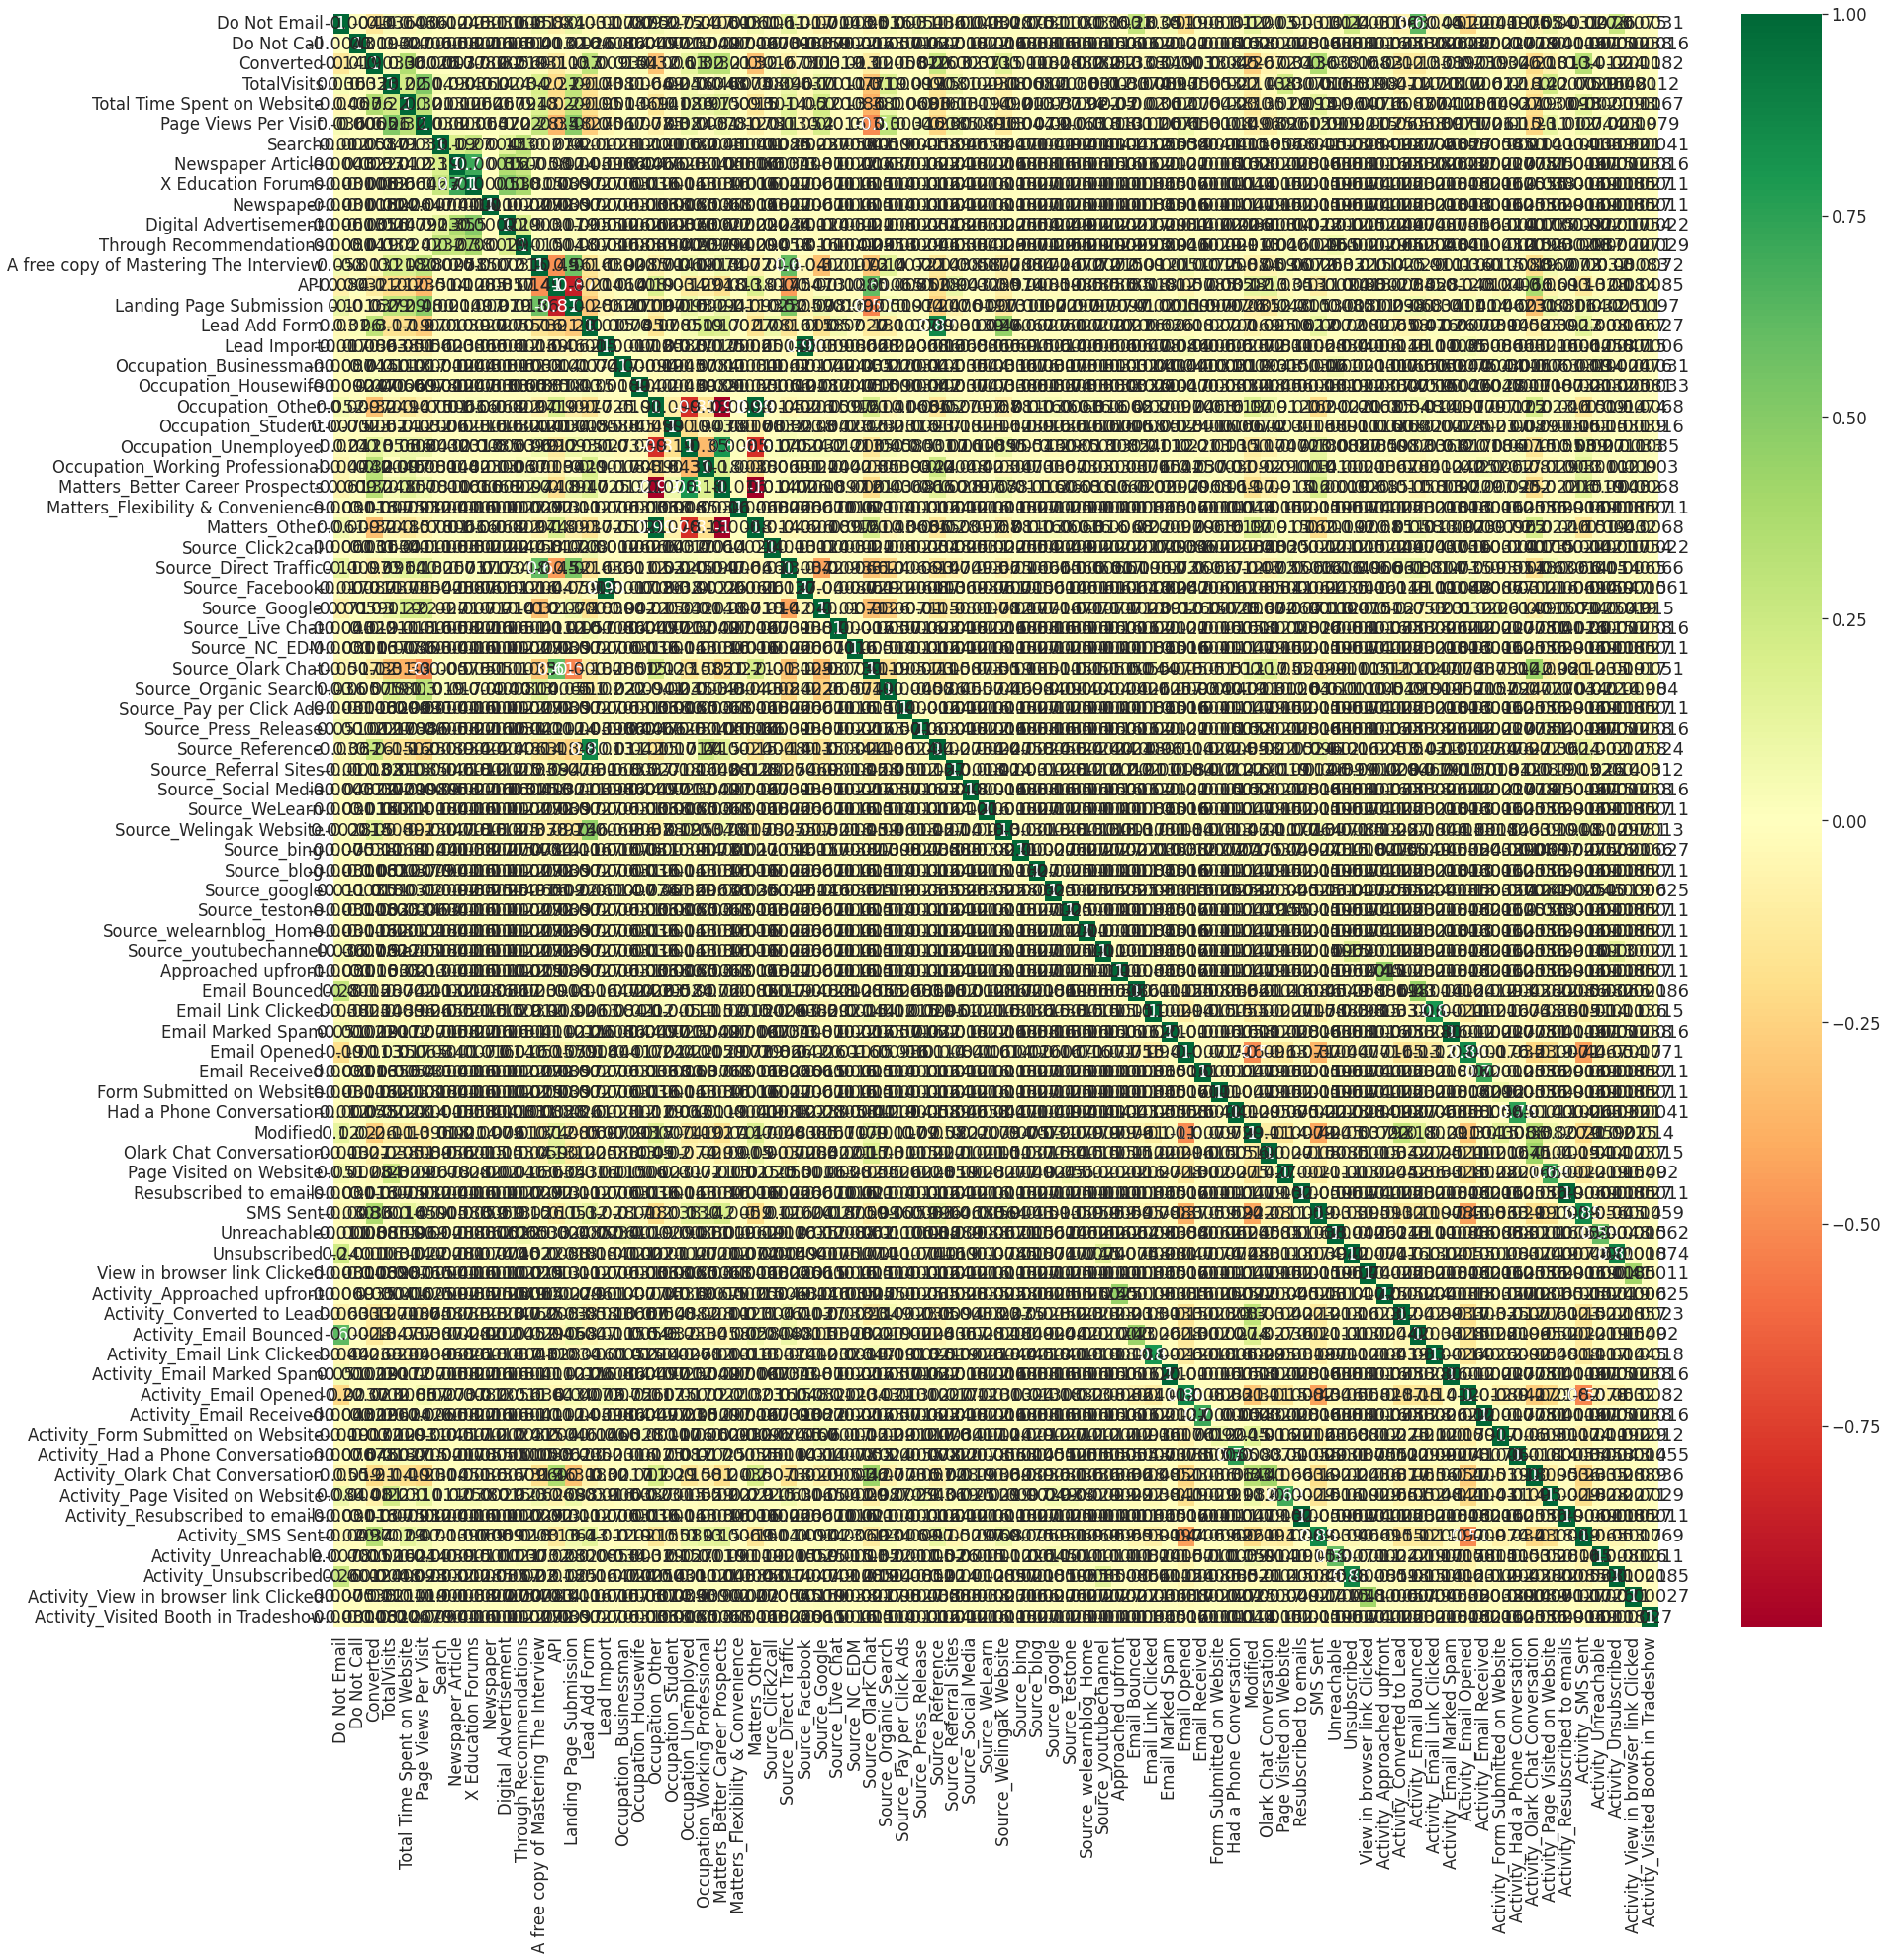

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(df.corr(),annot = True,cmap='RdYlGn')
plt.show()

In [ ]:
corr_matrix = df.corr()

In [ ]:
corr_matrix

Do Not Email  Do Not Call  Converted  \
Do Not Email                               1.000000    -0.004346  -0.140786   
Do Not Call                               -0.004346     1.000000   0.019024   
Converted                                 -0.140786     0.019024   1.000000   
TotalVisits                                0.035715     0.003190   0.032855   
Total Time Spent on Website               -0.046192     0.007029   0.359261   
...                                             ...          ...        ...   
Activity_SMS Sent                         -0.019915    -0.009704   0.335815   
Activity_Unreachable                       0.007831    -0.001486  -0.011625   
Activity_Unsubscribed                      0.261142    -0.001201  -0.023562   
Activity_View in browser link Clicked     -0.007529    -0.000382  -0.011237   
Activity_Visited Booth in Tradeshow       -0.003073    -0.000156  -0.008194   

                                       TotalVisits  \
Do Not Email                              0.035715   
Do Not Call                               0.003190   
Converted                                 0.032855   
TotalVisits                               1.000000   
Total Time Spent on Website               0.219723   
...                                            ...   
Activity_SMS Sent                        -0.002852   
Activity_Unreachable                      0.016242   
Activity_Unsubscribed                     0.004824   
Activity_View in browser link Clicked     0.021410   
Activity_Visited Booth in Tradeshow       0.001175   

                                       Total Time Spent on Website  \
Do Not Email                                             -0.046192   
Do Not Call                                               0.007029   
Converted                                                 0.359261   
TotalVisits                                               0.219723   
Total Time Spent on Website                               1.000000   
...                                                            ...   
Activity_SMS Sent                                         0.130375   
Activity_Unreachable                                      0.002054   
Activity_Unsubscribed                                    -0.000926   
Activity_View in browser link Clicked                    -0.010791   
Activity_Visited Booth in Tradeshow                      -0.006660   

                                       Page Views Per Visit    Search  \
Do Not Email                                       0.036403 -0.011505   
Do Not Call                                       -0.005979 -0.000584   
Converted                                          0.000260 -0.001735   
TotalVisits                                        0.511068  0.049479   
Total Time Spent on Website                        0.318350  0.013181   
...                                                     ...       ...   
Activity_SMS Sent                                  0.070092 -0.013430   
Activity_Unreachable                               0.043746 -0.003934   
Activity_Unsubscribed                              0.022788 -0.003180   
Activity_View in browser link Clicked              0.019244 -0.001011   
Activity_Visited Booth in Tradeshow                0.007919 -0.000413   

                                       Newspaper Article  X Education Forums  \
Do Not Email                                   -0.004346           -0.003073   
Do Not Call                                    -0.000220           -0.000156   
Converted                                       0.003718           -0.008194   
TotalVisits                                     0.033751            0.035749   
Total Time Spent on Website                     0.011618            0.006376   
...                                                  ...                 ...   
Activity_SMS Sent                              -0.009704           -0.006862   
Activity_Unreachable                           -0.001486           -0.001051   
Act

In [ ]:
threshold = 0.7

rows, cols = np.where((np.abs(corr_matrix) >= threshold) & (np.abs(corr_matrix) < 1.0))

# extract column and row names
# extract column and row names
corr_vars = []
for i in range(len(rows)):
    col_i = corr_matrix.columns[cols[i]]
    row_i = corr_matrix.index[rows[i]]
    # check if tuple is already in the list
    if (row_i, col_i) not in corr_vars and (col_i, row_i) not in corr_vars:
        corr_vars.append((row_i, col_i))

# print column and row names
corr_vars

[('Newspaper Article', 'X Education Forums'),
 ('API', 'Landing Page Submission'),
 ('Lead Add Form', 'Source_Reference'),
 ('Lead Import', 'Source_Facebook'),
 ('Occupation_Other', 'Occupation_Unemployed'),
 ('Occupation_Other', 'Matters_Better Career Prospects'),
 ('Occupation_Other', 'Matters_Other'),
 ('Occupation_Unemployed', 'Matters_Better Career Prospects'),
 ('Occupation_Unemployed', 'Matters_Other'),
 ('Matters_Better Career Prospects', 'Matters_Other'),
 ('Email Link Clicked', 'Activity_Email Link Clicked'),
 ('Email Opened', 'Activity_Email Opened'),
 ('Email Received', 'Activity_Email Received'),
 ('Had a Phone Conversation', 'Activity_Had a Phone Conversation'),
 ('SMS Sent', 'Activity_SMS Sent'),
 ('Unsubscribed', 'Activity_Unsubscribed')]

In [ ]:
#LET US DROP ONE OF THE HIGHLY RELATED COLUMNS in each tuple
col_drop = ['Newspaper Article','Landing Page Submission','Source_Reference','Occupation_Other', 'Occupation_Unemployed','Matters_Other','Activity_Email Link Clicked','Activity_Email Received','Activity_Had a Phone Conversation','Activity_SMS Sent','Activity_Unsubscribed','Source_Facebook','Activity_Email Opened']
df = df.drop(col_drop,axis=1)
df.shape

(9074, 67)

In [ ]:
df.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Search  \
0                            0                   0.0       0   
1                          674                   2.5       0   
2                         1532                   2.0       0   
3                          305                   1.0       0   
4                         1428                   1.0       0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  API  \
0                        0                                       0    1   
1                        0                                       0    1   
2                        0                                       1    0   
3                        0                                       0    0   
4                        0                                       0    0   

   Lead Add Form  Lead Import  Occupation_Businessman  Occupation_Housewife  \
0              0            0                       0                     0   
1              0            0                       0                     0   
2              0            0                       0                     0   
3              0            0                       0                     0   
4              0            0                       0                     0   

   Occupation_Student  Occupation_Working Professional  \
0                   0                                0   
1                   0                                0   
2                   1                                0   
3                   0                                0   
4                   0                                0   

   Matters_Better Career Prospects  Matters_Flexibility & Convenience  \
0                                1                                  0   
1                                1                                  0   
2                                1                                  0   
3                                1                                  0   
4                                1                                  0   

   Source_Click2call  Source_Direct Traffic  Source_Google  Source_Live Chat  \
0                  0                      0              0                 0   
1                  0                      0              0                 0   
2                  0                      1              0                 0   
3                  0                      1              0                 0   
4                  0                      0              1                 0   

   Source_NC_EDM  Source_Olark Chat  Source_Organic Search  \
0              0                  1                      0   
1              0                  0                      1   
2              0                  0                      0   
3              0                  0                      0   
4              0                  0                      0   

   Source_Pay per Click Ads  Source_Press_Release  Source_Referral Sites  \
0                         0                     0                      0   
1                         0                     0                      0   
2                         0                     0                      0   
3                         0                     0     

In [ ]:
corr_matrix = df.corr()
threshold = 0.7

rows, cols = np.where((np.abs(corr_matrix) >= threshold) & (np.abs(corr_matrix) < 1.0))

# extract column and row names
# extract column and row names
corr_vars = []
for i in range(len(rows)):
    col_i = corr_matrix.columns[cols[i]]
    row_i = corr_matrix.index[rows[i]]
    # check if tuple is already in the list
    if (row_i, col_i) not in corr_vars and (col_i, row_i) not in corr_vars:
        corr_vars.append((row_i, col_i))

# print column and row names
corr_vars

[]

### Step 4: Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variable to X
X = df.drop('Converted', axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  X Education Forums  Newspaper  \
0                   0.0       0                   0          0   
1                   2.5       0                   0          0   
2                   2.0       0                   0          0   
3                   1.0       0                   0          0   
4                   1.0       0                   0          0   

   Digital Advertisement  Through Recommendations  \
0                      0                        0   
1                      0                        0   
2                      0                        0   
3                      0                        0   
4                      0                        0   

   A free copy of Mastering The Interview  API  Lead Add Form  Lead Import  \
0                                       0    1              0            0   
1                                       0    1              0            0   
2                                       1    0              0            0   
3                                       0    0              0            0   
4                                       0    0              0            0   

   Occupation_Businessman  Occupation_Housewife  Occupation_Student  \
0                       0                     0                   0   
1                       0                     0                   0   
2                       0                     0                   1   
3                       0                     0                   0   
4                       0                     0                   0   

   Occupation_Working Professional  Matters_Better Career Prospects  \
0                                0                                1   
1                                0                                1   
2                                0                                1   
3                                0                                1   
4                                0                                1   

   Matters_Flexibility & Convenience  Source_Click2call  \
0                                  0                  0   
1                                  0                  0   
2                                  0                  0   
3                                  0                  0   
4                                  0                  0   

   Source_Direct Traffic  Source_Google  Source_Live Chat  Source_NC_EDM  \
0                      0              0                 0              0   
1                      0              0                 0              0   
2                      1              0                 0              0   
3                      1              0                 0              0   
4                      0              1                 0              0   

   Source_Olark Chat  Source_Organic Search  Source_Pay per Click Ads  \
0                  1                      0                         0   
1                  0                      1                         0   
2                  0                      0                         0   
3                  0                      0                         0   
4                  0                      0                         0   

   Source_Press_Release  Source_Referral Sites  Source_Social Media  \
0                     0                      0                    0   
1                     0                      0                    0   
2                     0                      0         

In [ ]:
# Putting response variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3009             0            0    -0.284595                    -0.160255   
1012             1            0    -0.284595                    -0.540048   
9226             0            0    -0.671384                    -0.888650   
4750             0            0    -0.284595                     1.643304   
7987             0            0     0.295588                     2.017593   

      Page Views Per Visit  Search  X Education Forums  Newspaper  \
3009             -0.179666       0                   0          0   
1012             -0.179666       0                   0          0   
9226             -1.132538       0                   0          0   
4750             -0.179666       0                   0          0   
7987              0.058552       0                   0          0   

      Digital Advertisement  Through Recommendations  \
3009                      0                        0   
1012                      0                        0   
9226                      0                        0   
4750                      0                        0   
7987                      0                        0   

      A free copy of Mastering The Interview  API  Lead Add Form  Lead Import  \
3009                                       1    0              0            0   
1012                                       0    0              0            0   
9226                                       0    1              0            0   
4750                                       0    0              0            0   
7987                                       0    0              0            0   

      Occupation_Businessman  Occupation_Housewife  Occupation_Student  \
3009                       0                     0                   0   
1012                       0                     0                   0   
9226                       0                     0                   0   
4750                       0                     0                   0   
7987                       0                     0                   0   

      Occupation_Working Professional  Matters_Better Career Prospects  \
3009                                0                                0   
1012                                1                                0   
9226                                0                                1   
4750                                0                                0   
7987                                0                                1   

      Matters_Flexibility & Convenience  Source_Click2call  \
3009                                  0                  0   
1012                                  0                  0   
9226                                  0                  0   
4750                                  0                  0   
7987                                  0                  0   

      Source_Direct Traffic  Source_Google  Source_Live Chat  Source_NC_EDM  \
3009                      1              0                 0              0   
1012                      1              0                 0              0   
9226                      0              0                 0              0   
4750                      1              0                 0              0   
7987                      1              0                 0              0   

      Source_Olark Chat  Source_Organic Search  Source_Pay per Click Ads  \
3009                  0                      0                         0   
1012                  0                      0                         0   
9226                  1                      0                         0   
4750                  0                      0                         0   
7987                  0                      0                         0   

      Source_Press_Release  Source_Referral Sites  Source_Social Media  \
3009                     0         

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

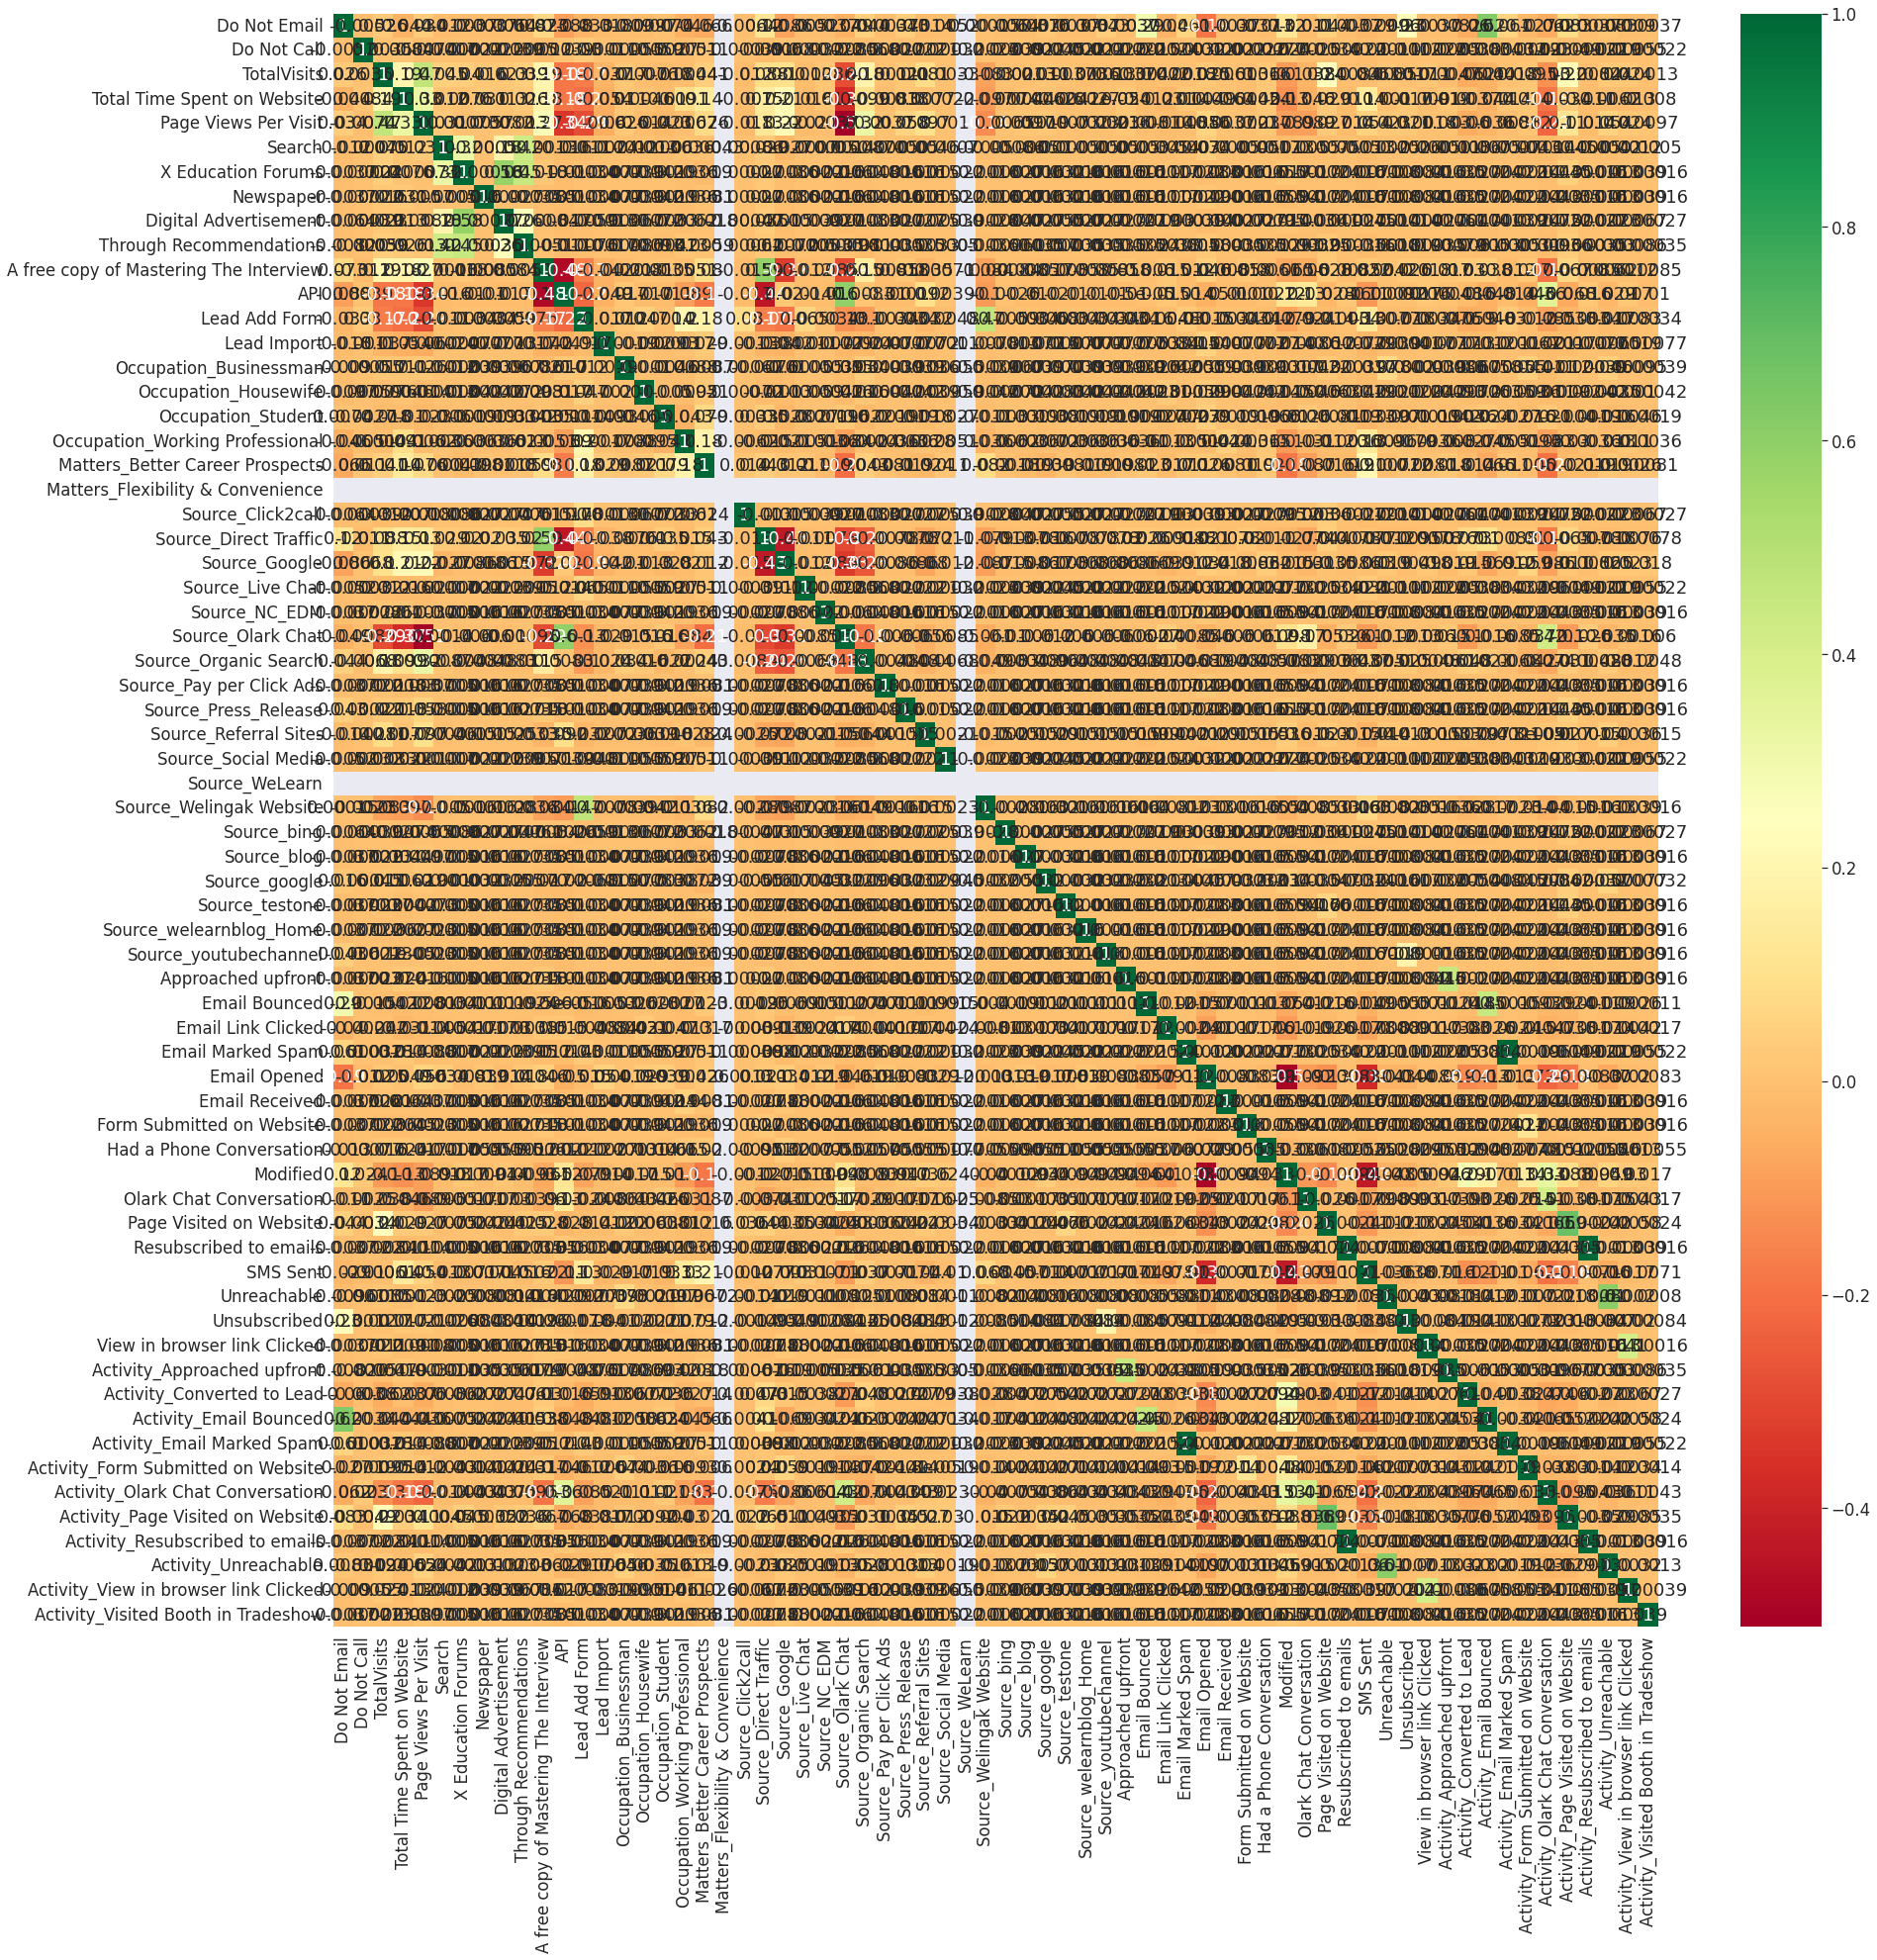

In [ ]:
plt.figure(figsize = (30,30))
sns.heatmap(X_train.corr(),annot = True,cmap='RdYlGn')
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [ ]:
import statsmodels.api as sm

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6289
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 27 Feb 2023   Deviance:                   1.5151e+05
Time:                        11:00:51   Pearson chi2:                 7.41e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   -1.15e+15   3.78e+07  -3.04e+07      0.000   -1.15e+15   -1.15e+15
Do Not Email                           -8.261e+14   4.36e+06   -1.9e+08      0.000   -8.26e+14   -8.26e+14
Do Not Call                             2.473e+15   4.76e+07    5.2e+07      0.000    2.47e+15    2.47e+15
TotalVisits                             4.997e+13   9.95e+05   5.02e+07      0.000       5e+13       5e+13
Total Time Spent on Website              3.26e+13   9.69e+05   3.37e+07      0.000    3.26e+13    3.26e+13
Page Views Per Visit                   -4.131e+13   1.18e+06   -3.5e+07      0.000   -4.13e+13   -4.13e+13
Search                                  2.033e+14   2.38e+07   8.54e+06      0.000    2.03e+14    2.03e+14
X Education Forums                     -4.163e+15   8.99e+07  -4.63e+07      0.000   -4.16e+15   -4.16e+15
Newspaper                               -5.88e+14   6.72e+07  -8.75e+06      0.000   -5.88e+14   -5.88e+14
Digital Advertisement                  -4.993e+14   4.75e+07  -1.05e+07      0.000   -4.99e+14   -4.99e+14
Through Recommendations                 3.134e+14   3.56e+07   8.79e+06      0.000    3.13e+14    3.13e+14
A free copy of Mastering The Interview  2.004e+13   2.39e+06    8.4e+06      0.000       2e+13       2e+13
API                                    -5.077e+14   2.38e+06  -2.13e+08      0.000   -5.08e+14   -5.08e+14
Lead Add Form                           1.634e+15   3.89e+07    4.2e+07      0.000    1.63e+15    1.63e+15
Lead Import                             1.511e+15   4.14e+07   3.65e+07      0.000    1.51e+15    1.51e+15
Occupation_Businessman                  1.464e+15   2.76e+07    5.3e+07      0.000    1.46e+15    1.46e+15
Occupation_Housewife                    4.262e+15   2.55e+07   1.67e+08      0.000    4.26e+15    4.26e+15
Occupation_Student                     -2.923e+13   5.78e+06  -5.06e+06      0.000   -2.92e+13   -2.92e+13
Occupation_Working Professional         9.421e+14   3.36e+06   2.81e+08      0.000    9.42e+14    9.42e+14
Matters_Better Career Prospects         1.979e+14   1.98e+06      1e+08      0.000    1.98e+14    1.98e+14
Matters_Flexibility & Convenience       3333.0666      0.002    1.4e+06      0.000    3333.062    3333.071
Source_Click2call                      -1.141e+15    3.9e+07  -2.93e+07      0.000   -1.14e+15   -1.14e+15
Source_Direct Traffic                   1.258e+15   3.91e+07   3.22e+07      0.000    1.26e+15    1.26e+15
Source_Google                           1.413e+15   3.91e+07   3.62e+07      0.000    1.41e+15    1.41e+15
Source_Live Chat                        3.712e+15   4.76e+07   7.79e+07      0.000    3.71e+15    3.71e+15
Source_NC_EDM                           6.251e+15   7.77e+07   8.05e+07      0.000    6

### Step 8: Feature Selection Using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 10)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([ True,  True, False,  True, False, False, False,  True, False,
       False, False, False,  True, False,  True,  True, False,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Search', False, 5),
 ('X Education Forums', False, 4),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 4),
 ('Through Recommendations', False, 4),
 ('A free copy of Mastering The Interview', False, 5),
 ('API', False, 3),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 2),
 ('Occupation_Businessman', True, 1),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Student', False, 4),
 ('Occupation_Working Professional', True, 1),
 ('Matters_Better Career Prospects', True, 1),
 ('Matters_Flexibility & Convenience', False, 5),
 ('Source_Click2call', False, 2),
 ('Source_Direct Traffic', True, 1),
 ('Source_Google', True, 1),
 ('Source_Live Chat', False, 5),
 ('Source_NC_EDM', True, 1),
 ('Source_Olark Chat', True, 1),
 ('Source_Organic Search', True, 1),
 ('Source_Pay per Click Ads', False, 3),
 ('Source_Press_Re

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'X Education Forums',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'API', 'Lead Import',
       'Occupation_Student', 'Matters_Flexibility & Convenience',
       'Source_Click2call', 'Source_Live Chat', 'Source_Pay per Click Ads',
       'Source_Press_Release', 'Source_Social Media', 'Source_WeLearn',
       'Source_bing', 'Source_blog', 'Source_testone',
       'Source_welearnblog_Home', 'Source_youtubechannel',
       'Approached upfront', 'Email Bounced', 'Email Marked Spam',
       'Email Received', 'Form Submitted on Website', 'SMS Sent',
       'Unsubscribed', 'View in browser link Clicked',
       'Activity_Email Marked Spam', 'Activity_View in browser link Clicked',
       'Activity_Visited Booth in Tradeshow'],
      dtype='object')

##### Assessing the model with StatsModels

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.1
Date:                Mon, 27 Feb 2023   Deviance:                       5012.2
Time:                        11:00:53   Pearson chi2:                 6.11e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1745      0.398      0.438      0.661      -0.606       0.955
Do Not Email                          -1.5118      0.203     -7.434      0.000      -1.910      -1.113
Do Not Call                           23.0431   5.43e+04      0.000      1.000   -1.06e+05    1.06e+05
Total Time Spent on Website            1.1390      0.042     27.236      0.000       1.057       1.221
Newspaper                            -25.1936   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Add Form                          2.5464      0.435      5.848      0.000       1.693       3.400
Occupation_Businessman                 1.5690      1.148      1.367      0.172      -0.681       3.819
Occupation_Housewife                  23.6243    2.6e+04      0.001      0.999   -5.09e+04    5.09e+04
Occupation_Working Professional        2.4963      0.192     12.990      0.000       2.120       2.873
Matters_Better Career Prospects        1.2153      0.090     13.529      0.000       1.039       1.391
Source_Direct Traffic                 -1.2270      0.392     -3.133      0.002      -1.995      -0.459
Source_Google                         -0.8201      0.390     -2.102      0.036      -1.585      -0.055
Source_NC_EDM                         23.7679   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Source_Olark Chat                      0.3547      0.392      0.904      0.366      -0.414       1.124
Source_Organic Search                 -1.0754      0.398     -2.702      0.007      -1.856      -0.295
Source_Referral Sites                 -1.1493      0.518     -2.217      0.027      -2.166      -0.133
Source_Welingak Website                2.0668      0.752      2.747      0.006       0.592       3.541
Source_google                        -21.9992   3.63e+04     -0.001      1.000   -7.12e+04    7.12e+04
Email Link Clicked                    -1.6865      0.261     -6.451      0.000      -2.199      -1.174
Email Opened                          -1.3098      0.090    -14.473      0.000      -1.487      -1.132
Had a Phone Conversation               2.0045      1.116      1.796      0.073      -0.183       4.192
Modified                              -1.4295      0.112    -12.772      0.000      -1.649      -1.210
Olark Chat Conversation               -1.1048      0.384     -2.878      0.004      -1.857      -0.353
Page Visited on Website               -0.9679      0.306     -3.167      0.002      -1.567      -0.369
Resubscribed to emails                12.0245   3.97e+04      0.000      1.000   -7.79e+04    7.79e+04
Unreachable                            1.3587      0.707      1.922      0.055      -0.027       2.744
Activity_Approached upfront           23.3662   3.16e+04      0.001      0.999   -6.19e+04    6.

In [ ]:
#LETS DROP Activity_Resubscribed to emails
col = col.drop('Activity_Resubscribed to emails')


In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.1
Date:                Mon, 27 Feb 2023   Deviance:                       5012.2
Time:                        11:00:53   Pearson chi2:                 6.11e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1745      0.398      0.438      0.661      -0.606       0.955
Do Not Email                          -1.5118      0.203     -7.434      0.000      -1.910      -1.113
Do Not Call                           23.0431   5.43e+04      0.000      1.000   -1.06e+05    1.06e+05
Total Time Spent on Website            1.1390      0.042     27.236      0.000       1.057       1.221
Newspaper                            -25.1936   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Add Form                          2.5464      0.435      5.848      0.000       1.693       3.400
Occupation_Businessman                 1.5690      1.148      1.367      0.172      -0.681       3.819
Occupation_Housewife                  23.6243    2.6e+04      0.001      0.999   -5.09e+04    5.09e+04
Occupation_Working Professional        2.4963      0.192     12.990      0.000       2.120       2.873
Matters_Better Career Prospects        1.2153      0.090     13.529      0.000       1.039       1.391
Source_Direct Traffic                 -1.2270      0.392     -3.133      0.002      -1.995      -0.459
Source_Google                         -0.8201      0.390     -2.102      0.036      -1.585      -0.055
Source_NC_EDM                         23.7679   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Source_Olark Chat                      0.3547      0.392      0.904      0.366      -0.414       1.124
Source_Organic Search                 -1.0754      0.398     -2.702      0.007      -1.856      -0.295
Source_Referral Sites                 -1.1493      0.518     -2.217      0.027      -2.166      -0.133
Source_Welingak Website                2.0668      0.752      2.747      0.006       0.592       3.541
Source_google                        -21.9992   3.63e+04     -0.001      1.000   -7.12e+04    7.12e+04
Email Link Clicked                    -1.6865      0.261     -6.451      0.000      -2.199      -1.174
Email Opened                          -1.3098      0.090    -14.473      0.000      -1.487      -1.132
Had a Phone Conversation               2.0045      1.116      1.796      0.073      -0.183       4.192
Modified                              -1.4295      0.112    -12.772      0.000      -1.649      -1.210
Olark Chat Conversation               -1.1048      0.384     -2.878      0.004      -1.857      -0.353
Page Visited on Website               -0.9679      0.306     -3.167      0.002      -1.567      -0.369
Resubscribed to emails                24.0490   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Unreachable                            1.3587      0.707      1.922      0.055      -0.027       2.744
Activity_Approached upfront           23.3662   3.16e+04      0.001      0.999   -6.19e+04    6.

In [ ]:
#LETS DROP Resubscribed to emails
col = col.drop('Resubscribed to emails')

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2507.0
Date:                Mon, 27 Feb 2023   Deviance:                       5014.1
Time:                        11:00:53   Pearson chi2:                 6.12e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1804      0.398      0.453      0.651      -0.600       0.961
Do Not Email                          -1.5136      0.203     -7.442      0.000      -1.912      -1.115
Do Not Call                           23.0452   5.43e+04      0.000      1.000   -1.06e+05    1.06e+05
Total Time Spent on Website            1.1389      0.042     27.233      0.000       1.057       1.221
Newspaper                            -25.1919   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Add Form                          2.5465      0.435      5.848      0.000       1.693       3.400
Occupation_Businessman                 1.5694      1.148      1.367      0.171      -0.680       3.819
Occupation_Housewife                  23.6258    2.6e+04      0.001      0.999   -5.09e+04    5.09e+04
Occupation_Working Professional        2.4968      0.192     12.991      0.000       2.120       2.873
Matters_Better Career Prospects        1.2117      0.090     13.504      0.000       1.036       1.388
Source_Direct Traffic                 -1.2278      0.392     -3.135      0.002      -1.996      -0.460
Source_Google                         -0.8209      0.390     -2.104      0.035      -1.586      -0.056
Source_NC_EDM                         23.7651   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Source_Olark Chat                      0.3580      0.392      0.913      0.361      -0.411       1.127
Source_Organic Search                 -1.0763      0.398     -2.704      0.007      -1.856      -0.296
Source_Referral Sites                 -1.1497      0.518     -2.217      0.027      -2.166      -0.133
Source_Welingak Website                2.0671      0.752      2.747      0.006       0.592       3.542
Source_google                        -22.0028   3.63e+04     -0.001      1.000   -7.12e+04    7.12e+04
Email Link Clicked                    -1.6902      0.261     -6.467      0.000      -2.202      -1.178
Email Opened                          -1.3128      0.090    -14.510      0.000      -1.490      -1.136
Had a Phone Conversation               2.0020      1.116      1.794      0.073      -0.186       4.190
Modified                              -1.4328      0.112    -12.804      0.000      -1.652      -1.213
Olark Chat Conversation               -1.1084      0.384     -2.888      0.004      -1.860      -0.356
Page Visited on Website               -0.9717      0.306     -3.180      0.001      -1.571      -0.373
Unreachable                            1.3537      0.707      1.915      0.055      -0.032       2.739
Activity_Approached upfront           23.3650   3.16e+04      0.001      0.999   -6.19e+04    6.19e+04
Activity_Converted to Lead            -1.2763      0.238     -5.372      0.000      -1.742      

In [ ]:
#LET'S ELIMINATE Source_google
col = col.drop('Source_google')

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2507.8
Date:                Mon, 27 Feb 2023   Deviance:                       5015.7
Time:                        11:00:53   Pearson chi2:                 6.12e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0783      0.391      0.200      0.841      -0.687       0.844
Do Not Email                          -1.5129      0.203     -7.440      0.000      -1.911      -1.114
Do Not Call                           23.0447   5.43e+04      0.000      1.000   -1.06e+05    1.06e+05
Total Time Spent on Website            1.1377      0.042     27.223      0.000       1.056       1.220
Newspaper                            -25.1914   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Add Form                          2.6424      0.430      6.147      0.000       1.800       3.485
Occupation_Businessman                 1.5677      1.148      1.366      0.172      -0.682       3.817
Occupation_Housewife                  23.6230    2.6e+04      0.001      0.999   -5.09e+04    5.09e+04
Occupation_Working Professional        2.4963      0.192     12.990      0.000       2.120       2.873
Matters_Better Career Prospects        1.2162      0.090     13.564      0.000       1.040       1.392
Source_Direct Traffic                 -1.1289      0.385     -2.935      0.003      -1.883      -0.375
Source_Google                         -0.7215      0.383     -1.884      0.060      -1.472       0.029
Source_NC_EDM                         23.8670   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Source_Olark Chat                      0.4552      0.386      1.180      0.238      -0.301       1.211
Source_Organic Search                 -0.9771      0.391     -2.499      0.012      -1.743      -0.211
Source_Referral Sites                 -1.0495      0.513     -2.046      0.041      -2.055      -0.044
Source_Welingak Website                2.0668      0.752      2.747      0.006       0.592       3.542
Email Link Clicked                    -1.6898      0.261     -6.465      0.000      -2.202      -1.178
Email Opened                          -1.3115      0.090    -14.499      0.000      -1.489      -1.134
Had a Phone Conversation               2.0011      1.116      1.793      0.073      -0.187       4.189
Modified                              -1.4317      0.112    -12.798      0.000      -1.651      -1.212
Olark Chat Conversation               -1.1070      0.384     -2.885      0.004      -1.859      -0.355
Page Visited on Website               -0.9560      0.305     -3.132      0.002      -1.554      -0.358
Unreachable                            1.4195      0.705      2.014      0.044       0.038       2.801
Activity_Approached upfront           23.3639   3.16e+04      0.001      0.999   -6.19e+04    6.19e+04
Activity_Converted to Lead            -1.2772      0.238     -5.377      0.000      -1.743      -0.812
Activity_Email Bounced                -1.3449      0.424     -3.174      0.002      -2.175      

In [ ]:
#LET's drop Source_NC_EDM
col = col.drop('Source_NC_EDM')

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2508.7
Date:                Mon, 27 Feb 2023   Deviance:                       5017.4
Time:                        11:00:54   Pearson chi2:                 6.12e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1586      0.379      0.418      0.676      -0.584       0.902
Do Not Email                          -1.5135      0.203     -7.444      0.000      -1.912      -1.115
Do Not Call                           23.0450   5.43e+04      0.000      1.000   -1.06e+05    1.06e+05
Total Time Spent on Website            1.1388      0.042     27.252      0.000       1.057       1.221
Newspaper                            -25.1940   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Add Form                          2.5668      0.420      6.109      0.000       1.743       3.390
Occupation_Businessman                 1.5683      1.148      1.366      0.172      -0.681       3.818
Occupation_Housewife                  23.6234    2.6e+04      0.001      0.999   -5.09e+04    5.09e+04
Occupation_Working Professional        2.4964      0.192     12.988      0.000       2.120       2.873
Matters_Better Career Prospects        1.2129      0.090     13.541      0.000       1.037       1.388
Source_Direct Traffic                 -1.2070      0.373     -3.232      0.001      -1.939      -0.475
Source_Google                         -0.7997      0.372     -2.152      0.031      -1.528      -0.071
Source_Olark Chat                      0.3781      0.375      1.009      0.313      -0.356       1.113
Source_Organic Search                 -1.0551      0.380     -2.777      0.005      -1.800      -0.310
Source_Referral Sites                 -1.1273      0.505     -2.234      0.026      -2.117      -0.138
Source_Welingak Website                2.0666      0.752      2.747      0.006       0.592       3.541
Email Link Clicked                    -1.6900      0.261     -6.466      0.000      -2.202      -1.178
Email Opened                          -1.3106      0.090    -14.490      0.000      -1.488      -1.133
Had a Phone Conversation               2.0018      1.116      1.793      0.073      -0.186       4.189
Modified                              -1.4328      0.112    -12.807      0.000      -1.652      -1.214
Olark Chat Conversation               -1.1083      0.384     -2.888      0.004      -1.860      -0.356
Page Visited on Website               -0.9558      0.305     -3.131      0.002      -1.554      -0.358
Unreachable                            1.4215      0.705      2.017      0.044       0.040       2.803
Activity_Approached upfront           23.3651   3.16e+04      0.001      0.999   -6.19e+04    6.19e+04
Activity_Converted to Lead            -1.2764      0.238     -5.373      0.000      -1.742      -0.811
Activity_Email Bounced                -1.3439      0.424     -3.171      0.002      -2.174      -0.513
Activity_Form Submitted on Website    -0.6755      0.350     -1.931      0.053      -1.361      

In [ ]:
#lets drop Newspaper
col = col.drop('Newspaper')


In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.5
Date:                Mon, 27 Feb 2023   Deviance:                       5021.0
Time:                        11:00:54   Pearson chi2:                 6.12e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1598      0.379      0.421      0.673      -0.583       0.903
Do Not Email                          -1.5127      0.203     -7.442      0.000      -1.911      -1.114
Do Not Call                           22.0456   3.29e+04      0.001      0.999   -6.45e+04    6.45e+04
Total Time Spent on Website            1.1359      0.042     27.221      0.000       1.054       1.218
Lead Add Form                          2.5658      0.420      6.107      0.000       1.742       3.389
Occupation_Businessman                 1.5669      1.148      1.365      0.172      -0.682       3.816
Occupation_Housewife                  22.6240   1.58e+04      0.001      0.999   -3.08e+04    3.09e+04
Occupation_Working Professional        2.4971      0.192     12.996      0.000       2.121       2.874
Matters_Better Career Prospects        1.2111      0.090     13.527      0.000       1.036       1.387
Source_Direct Traffic                 -1.2085      0.373     -3.236      0.001      -1.940      -0.477
Source_Google                         -0.7975      0.372     -2.146      0.032      -1.526      -0.069
Source_Olark Chat                      0.3767      0.375      1.005      0.315      -0.358       1.111
Source_Organic Search                 -1.0530      0.380     -2.771      0.006      -1.798      -0.308
Source_Referral Sites                 -1.1258      0.505     -2.231      0.026      -2.115      -0.137
Source_Welingak Website                2.0662      0.752      2.746      0.006       0.591       3.541
Email Link Clicked                    -1.6897      0.261     -6.467      0.000      -2.202      -1.178
Email Opened                          -1.3132      0.090    -14.523      0.000      -1.490      -1.136
Had a Phone Conversation               1.9994      1.116      1.791      0.073      -0.188       4.187
Modified                              -1.4326      0.112    -12.811      0.000      -1.652      -1.213
Olark Chat Conversation               -1.1071      0.384     -2.887      0.004      -1.859      -0.355
Page Visited on Website               -0.9558      0.305     -3.133      0.002      -1.554      -0.358
Unreachable                            1.4200      0.705      2.015      0.044       0.039       2.801
Activity_Approached upfront           22.3665   1.92e+04      0.001      0.999   -3.75e+04    3.76e+04
Activity_Converted to Lead            -1.2749      0.237     -5.369      0.000      -1.740      -0.810
Activity_Email Bounced                -1.3436      0.424     -3.171      0.002      -2.174      -0.513
Activity_Form Submitted on Website    -0.6745      0.350     -1.929      0.054      -1.360       0.011
Activity_Olark Chat Conversation      -1.4728      0.201     -7.341      0.000      -1.866      

In [ ]:
#LETS drop Activity_Approached upfront
col = col.drop('Activity_Approached upfront')

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.6
Date:                Mon, 27 Feb 2023   Deviance:                       5027.2
Time:                        11:00:54   Pearson chi2:                 6.13e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1544      0.379      0.407      0.684      -0.589       0.897
Do Not Email                          -1.5151      0.203     -7.455      0.000      -1.913      -1.117
Do Not Call                           22.0454   3.29e+04      0.001      0.999   -6.44e+04    6.45e+04
Total Time Spent on Website            1.1373      0.042     27.260      0.000       1.056       1.219
Lead Add Form                          2.5629      0.420      6.101      0.000       1.740       3.386
Occupation_Businessman                 1.5674      1.148      1.365      0.172      -0.683       3.818
Occupation_Housewife                  22.6232   1.58e+04      0.001      0.999   -3.08e+04    3.09e+04
Occupation_Working Professional        2.4946      0.192     12.982      0.000       2.118       2.871
Matters_Better Career Prospects        1.2168      0.090     13.594      0.000       1.041       1.392
Source_Direct Traffic                 -1.2082      0.373     -3.236      0.001      -1.940      -0.476
Source_Google                         -0.7993      0.372     -2.151      0.031      -1.528      -0.071
Source_Olark Chat                      0.3867      0.375      1.032      0.302      -0.348       1.121
Source_Organic Search                 -1.0507      0.380     -2.766      0.006      -1.795      -0.306
Source_Referral Sites                 -1.1285      0.505     -2.236      0.025      -2.118      -0.139
Source_Welingak Website                2.0661      0.752      2.746      0.006       0.591       3.541
Email Link Clicked                    -1.6913      0.261     -6.473      0.000      -2.203      -1.179
Email Opened                          -1.3139      0.090    -14.529      0.000      -1.491      -1.137
Had a Phone Conversation               2.0023      1.116      1.794      0.073      -0.186       4.190
Modified                              -1.4170      0.111    -12.716      0.000      -1.635      -1.199
Olark Chat Conversation               -1.0915      0.383     -2.847      0.004      -1.843      -0.340
Page Visited on Website               -0.9405      0.305     -3.083      0.002      -1.538      -0.343
Unreachable                            1.4371      0.705      2.039      0.041       0.056       2.818
Activity_Converted to Lead            -1.2905      0.237     -5.437      0.000      -1.756      -0.825
Activity_Email Bounced                -1.3504      0.423     -3.189      0.001      -2.180      -0.520
Activity_Form Submitted on Website    -0.6895      0.350     -1.972      0.049      -1.375      -0.004
Activity_Olark Chat Conversation      -1.4923      0.200     -7.449      0.000      -1.885      -1.100
Activity_Page Visited on Website      -0.6262      0.225     -2.786      0.005      -1.067      

In [ ]:
#LETS DROP Occupation_Housewife
col = col.drop('Occupation_Housewife')

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2517.7
Date:                Mon, 27 Feb 2023   Deviance:                       5035.4
Time:                        11:00:55   Pearson chi2:                 6.14e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1480      0.379      0.390      0.696      -0.595       0.891
Do Not Email                          -1.5164      0.203     -7.460      0.000      -1.915      -1.118
Do Not Call                           20.0306   1.21e+04      0.002      0.999   -2.37e+04    2.38e+04
Total Time Spent on Website            1.1368      0.042     27.276      0.000       1.055       1.218
Lead Add Form                          2.5862      0.420      6.157      0.000       1.763       3.409
Occupation_Businessman                 1.5603      1.149      1.357      0.175      -0.693       3.813
Occupation_Working Professional        2.4896      0.192     12.955      0.000       2.113       2.866
Matters_Better Career Prospects        1.2196      0.089     13.630      0.000       1.044       1.395
Source_Direct Traffic                 -1.2044      0.373     -3.226      0.001      -1.936      -0.473
Source_Google                         -0.7976      0.372     -2.146      0.032      -1.526      -0.069
Source_Olark Chat                      0.3869      0.375      1.033      0.302      -0.347       1.121
Source_Organic Search                 -1.0383      0.380     -2.734      0.006      -1.783      -0.294
Source_Referral Sites                 -1.1267      0.505     -2.233      0.026      -2.116      -0.138
Source_Welingak Website                2.0428      0.752      2.715      0.007       0.568       3.517
Email Link Clicked                    -1.6770      0.260     -6.462      0.000      -2.186      -1.168
Email Opened                          -1.3063      0.090    -14.459      0.000      -1.483      -1.129
Had a Phone Conversation               2.0038      1.116      1.795      0.073      -0.184       4.192
Modified                              -1.4153      0.111    -12.703      0.000      -1.634      -1.197
Olark Chat Conversation               -1.0897      0.383     -2.842      0.004      -1.841      -0.338
Page Visited on Website               -0.9381      0.305     -3.076      0.002      -1.536      -0.340
Unreachable                            1.4406      0.705      2.044      0.041       0.059       2.822
Activity_Converted to Lead            -1.2918      0.237     -5.444      0.000      -1.757      -0.827
Activity_Email Bounced                -1.3492      0.423     -3.186      0.001      -2.179      -0.519
Activity_Form Submitted on Website    -0.6891      0.350     -1.971      0.049      -1.374      -0.004
Activity_Olark Chat Conversation      -1.4910      0.200     -7.442      0.000      -1.884      -1.098
Activity_Page Visited on Website      -0.6276      0.225     -2.793      0.005      -1.068      -0.187
Activity_Unreachable                  -0.9305      0.495     -1.881      0.060      -1.900      

In [ ]:
#LETS DROP Do Not Call
col = col.drop('Do Not Call')


In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2518.6
Date:                Mon, 27 Feb 2023   Deviance:                       5037.3
Time:                        11:00:55   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1476      0.379      0.389      0.697      -0.595       0.891
Do Not Email                          -1.5177      0.203     -7.462      0.000      -1.916      -1.119
Total Time Spent on Website            1.1372      0.042     27.292      0.000       1.055       1.219
Lead Add Form                          2.6076      0.420      6.205      0.000       1.784       3.431
Occupation_Businessman                 1.5595      1.150      1.356      0.175      -0.695       3.814
Occupation_Working Professional        2.4882      0.192     12.946      0.000       2.112       2.865
Matters_Better Career Prospects        1.2203      0.089     13.640      0.000       1.045       1.396
Source_Direct Traffic                 -1.2048      0.373     -3.227      0.001      -1.937      -0.473
Source_Google                         -0.7976      0.372     -2.146      0.032      -1.526      -0.069
Source_Olark Chat                      0.3850      0.375      1.028      0.304      -0.349       1.119
Source_Organic Search                 -1.0388      0.380     -2.735      0.006      -1.783      -0.294
Source_Referral Sites                 -1.1289      0.505     -2.237      0.025      -2.118      -0.140
Source_Welingak Website                2.0215      0.752      2.686      0.007       0.547       3.496
Email Link Clicked                    -1.6775      0.260     -6.460      0.000      -2.186      -1.168
Email Opened                          -1.3067      0.090    -14.458      0.000      -1.484      -1.130
Had a Phone Conversation               2.0040      1.116      1.795      0.073      -0.184       4.192
Modified                              -1.4142      0.111    -12.694      0.000      -1.633      -1.196
Olark Chat Conversation               -1.1036      0.383     -2.883      0.004      -1.854      -0.353
Page Visited on Website               -0.9367      0.305     -3.071      0.002      -1.534      -0.339
Unreachable                            1.4434      0.705      2.047      0.041       0.062       2.825
Activity_Converted to Lead            -1.2929      0.237     -5.449      0.000      -1.758      -0.828
Activity_Email Bounced                -1.3480      0.423     -3.184      0.001      -2.178      -0.518
Activity_Form Submitted on Website    -0.6908      0.350     -1.975      0.048      -1.376      -0.005
Activity_Olark Chat Conversation      -1.4761      0.199     -7.423      0.000      -1.866      -1.086
Activity_Page Visited on Website      -0.6288      0.225     -2.798      0.005      -1.069      -0.188
Activity_Unreachable                  -0.9327      0.495     -1.885      0.059      -1.903       0.037
================================================================================================

In [ ]:
#LETS DROP const
col = col.drop('Source_Olark Chat')


In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2519.2
Date:                Mon, 27 Feb 2023   Deviance:                       5038.4
Time:                        11:00:55   Pearson chi2:                 6.14e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5142      0.126      4.086      0.000       0.268       0.761
Do Not Email                          -1.5213      0.203     -7.485      0.000      -1.920      -1.123
Total Time Spent on Website            1.1356      0.042     27.295      0.000       1.054       1.217
Lead Add Form                          2.2462      0.228      9.859      0.000       1.800       2.693
Occupation_Businessman                 1.5586      1.150      1.355      0.175      -0.695       3.813
Occupation_Working Professional        2.4868      0.192     12.938      0.000       2.110       2.863
Matters_Better Career Prospects        1.2185      0.089     13.623      0.000       1.043       1.394
Source_Direct Traffic                 -1.5669      0.120    -13.048      0.000      -1.802      -1.332
Source_Google                         -1.1599      0.114    -10.182      0.000      -1.383      -0.937
Source_Organic Search                 -1.4011      0.138    -10.118      0.000      -1.673      -1.130
Source_Referral Sites                 -1.4917      0.359     -4.151      0.000      -2.196      -0.787
Source_Welingak Website                2.0187      0.752      2.683      0.007       0.544       3.493
Email Link Clicked                    -1.6735      0.260     -6.443      0.000      -2.183      -1.164
Email Opened                          -1.3104      0.090    -14.512      0.000      -1.487      -1.133
Had a Phone Conversation               2.0004      1.116      1.792      0.073      -0.188       4.188
Modified                              -1.4163      0.111    -12.717      0.000      -1.635      -1.198
Olark Chat Conversation               -1.1025      0.383     -2.879      0.004      -1.853      -0.352
Page Visited on Website               -0.9296      0.305     -3.051      0.002      -1.527      -0.332
Unreachable                            1.4603      0.705      2.071      0.038       0.078       2.843
Activity_Converted to Lead            -1.2925      0.237     -5.450      0.000      -1.757      -0.828
Activity_Email Bounced                -1.3407      0.423     -3.167      0.002      -2.170      -0.511
Activity_Form Submitted on Website    -0.6888      0.350     -1.970      0.049      -1.374      -0.004
Activity_Olark Chat Conversation      -1.4666      0.199     -7.377      0.000      -1.856      -1.077
Activity_Page Visited on Website      -0.6389      0.224     -2.849      0.004      -1.078      -0.199
Activity_Unreachable                  -0.9504      0.495     -1.919      0.055      -1.921       0.020
======================================================================================================
"""

In [ ]:
#LETS DROP Occupation_Businessman
col = col.drop('Occupation_Businessman')

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2520.0
Date:                Mon, 27 Feb 2023   Deviance:                       5040.1
Time:                        11:00:55   Pearson chi2:                 6.14e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5123      0.126      4.071      0.000       0.266       0.759
Do Not Email                          -1.5223      0.203     -7.491      0.000      -1.921      -1.124
Total Time Spent on Website            1.1348      0.042     27.298      0.000       1.053       1.216
Lead Add Form                          2.2520      0.228      9.887      0.000       1.806       2.698
Occupation_Working Professional        2.4847      0.192     12.930      0.000       2.108       2.861
Matters_Better Career Prospects        1.2185      0.089     13.624      0.000       1.043       1.394
Source_Direct Traffic                 -1.5652      0.120    -13.039      0.000      -1.801      -1.330
Source_Google                         -1.1582      0.114    -10.171      0.000      -1.381      -0.935
Source_Organic Search                 -1.3956      0.138    -10.086      0.000      -1.667      -1.124
Source_Referral Sites                 -1.4917      0.359     -4.152      0.000      -2.196      -0.788
Source_Welingak Website                2.0130      0.752      2.675      0.007       0.538       3.488
Email Link Clicked                    -1.6733      0.260     -6.442      0.000      -2.182      -1.164
Email Opened                          -1.3087      0.090    -14.498      0.000      -1.486      -1.132
Had a Phone Conversation               2.0002      1.116      1.792      0.073      -0.188       4.188
Modified                              -1.4150      0.111    -12.710      0.000      -1.633      -1.197
Olark Chat Conversation               -1.1010      0.383     -2.876      0.004      -1.851      -0.351
Page Visited on Website               -0.9172      0.305     -3.011      0.003      -1.514      -0.320
Unreachable                            1.4695      0.704      2.087      0.037       0.090       2.849
Activity_Converted to Lead            -1.2934      0.237     -5.455      0.000      -1.758      -0.829
Activity_Email Bounced                -1.3399      0.423     -3.166      0.002      -2.169      -0.510
Activity_Form Submitted on Website    -0.6684      0.350     -1.910      0.056      -1.354       0.017
Activity_Olark Chat Conversation      -1.4669      0.199     -7.380      0.000      -1.857      -1.077
Activity_Page Visited on Website      -0.6398      0.224     -2.853      0.004      -1.079      -0.200
Activity_Unreachable                  -0.9517      0.495     -1.922      0.055      -1.922       0.019
======================================================================================================
"""

In [ ]:
#LETS DROP Had a Phone Conversation
col = col.drop('Had a Phone Conversation')

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.3
Date:                Mon, 27 Feb 2023   Deviance:                       5044.6
Time:                        11:00:55   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5197      0.126      4.131      0.000       0.273       0.766
Do Not Email                          -1.5300      0.203     -7.529      0.000      -1.928      -1.132
Total Time Spent on Website            1.1326      0.042     27.277      0.000       1.051       1.214
Lead Add Form                          2.2528      0.228      9.888      0.000       1.806       2.699
Occupation_Working Professional        2.4830      0.192     12.922      0.000       2.106       2.860
Matters_Better Career Prospects        1.2180      0.089     13.624      0.000       1.043       1.393
Source_Direct Traffic                 -1.5612      0.120    -13.010      0.000      -1.796      -1.326
Source_Google                         -1.1489      0.114    -10.102      0.000      -1.372      -0.926
Source_Organic Search                 -1.3925      0.138    -10.065      0.000      -1.664      -1.121
Source_Referral Sites                 -1.4883      0.359     -4.143      0.000      -2.192      -0.784
Source_Welingak Website                2.0134      0.753      2.676      0.007       0.538       3.488
Email Link Clicked                    -1.6841      0.260     -6.485      0.000      -2.193      -1.175
Email Opened                          -1.3203      0.090    -14.650      0.000      -1.497      -1.144
Modified                              -1.4263      0.111    -12.826      0.000      -1.644      -1.208
Olark Chat Conversation               -1.1114      0.383     -2.904      0.004      -1.862      -0.361
Page Visited on Website               -0.9284      0.304     -3.049      0.002      -1.525      -0.332
Unreachable                            1.4570      0.704      2.070      0.038       0.077       2.837
Activity_Converted to Lead            -1.2934      0.237     -5.457      0.000      -1.758      -0.829
Activity_Email Bounced                -1.3381      0.423     -3.162      0.002      -2.168      -0.509
Activity_Form Submitted on Website    -0.6695      0.350     -1.914      0.056      -1.355       0.016
Activity_Olark Chat Conversation      -1.4660      0.199     -7.376      0.000      -1.856      -1.076
Activity_Page Visited on Website      -0.6396      0.224     -2.853      0.004      -1.079      -0.200
Activity_Unreachable                  -0.9524      0.495     -1.924      0.054      -1.923       0.018
======================================================================================================
"""

In [ ]:
#LETS DROP Activity_Form Submitted on Website
col = col.drop('Activity_Form Submitted on Website')

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.3
Date:                Mon, 27 Feb 2023   Deviance:                       5048.5
Time:                        11:00:55   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.5249      0.126      4.172      0.000       0.278       0.771
Do Not Email                        -1.5292      0.203     -7.522      0.000      -1.928      -1.131
Total Time Spent on Website          1.1319      0.041     27.278      0.000       1.051       1.213
Lead Add Form                        2.2568      0.228      9.904      0.000       1.810       2.703
Occupation_Working Professional      2.4791      0.192     12.924      0.000       2.103       2.855
Matters_Better Career Prospects      1.2153      0.089     13.603      0.000       1.040       1.390
Source_Direct Traffic               -1.5669      0.120    -13.060      0.000      -1.802      -1.332
Source_Google                       -1.1561      0.114    -10.170      0.000      -1.379      -0.933
Source_Organic Search               -1.3892      0.138    -10.041      0.000      -1.660      -1.118
Source_Referral Sites               -1.4896      0.359     -4.155      0.000      -2.192      -0.787
Source_Welingak Website              2.0204      0.753      2.684      0.007       0.545       3.495
Email Link Clicked                  -1.6844      0.260     -6.487      0.000      -2.193      -1.175
Email Opened                        -1.3195      0.090    -14.643      0.000      -1.496      -1.143
Modified                            -1.4719      0.109    -13.501      0.000      -1.686      -1.258
Olark Chat Conversation             -1.1572      0.382     -3.029      0.002      -1.906      -0.409
Page Visited on Website             -0.9743      0.304     -3.210      0.001      -1.569      -0.379
Unreachable                          1.4105      0.703      2.005      0.045       0.032       2.789
Activity_Converted to Lead          -1.2452      0.236     -5.281      0.000      -1.707      -0.783
Activity_Email Bounced              -1.3183      0.424     -3.111      0.002      -2.149      -0.488
Activity_Olark Chat Conversation    -1.4216      0.198     -7.195      0.000      -1.809      -1.034
Activity_Page Visited on Website    -0.5921      0.223     -2.656      0.008      -1.029      -0.155
Activity_Unreachable                -0.9056      0.495     -1.831      0.067      -1.875       0.064
====================================================================================================
"""

In [ ]:
#LETS DROP Activity_Unreachable
col = col.drop('Activity_Unreachable')

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm15.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2526.2
Date:                Mon, 27 Feb 2023   Deviance:                       5052.4
Time:                        11:00:55   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.5334      0.126      4.242      0.000       0.287       0.780
Do Not Email                        -1.5351      0.203     -7.558      0.000      -1.933      -1.137
Total Time Spent on Website          1.1331      0.041     27.316      0.000       1.052       1.214
Lead Add Form                        2.2581      0.228      9.913      0.000       1.812       2.705
Occupation_Working Professional      2.4870      0.192     12.963      0.000       2.111       2.863
Matters_Better Career Prospects      1.2098      0.089     13.545      0.000       1.035       1.385
Source_Direct Traffic               -1.5695      0.120    -13.079      0.000      -1.805      -1.334
Source_Google                       -1.1618      0.114    -10.220      0.000      -1.385      -0.939
Source_Organic Search               -1.3966      0.138    -10.102      0.000      -1.668      -1.126
Source_Referral Sites               -1.5101      0.357     -4.234      0.000      -2.209      -0.811
Source_Welingak Website              2.0298      0.753      2.697      0.007       0.554       3.505
Email Link Clicked                  -1.6861      0.260     -6.493      0.000      -2.195      -1.177
Email Opened                        -1.3203      0.090    -14.651      0.000      -1.497      -1.144
Modified                            -1.5062      0.108    -13.976      0.000      -1.717      -1.295
Olark Chat Conversation             -1.1926      0.382     -3.125      0.002      -1.941      -0.445
Page Visited on Website             -1.0090      0.303     -3.328      0.001      -1.603      -0.415
Unreachable                          0.5050      0.500      1.010      0.312      -0.475       1.485
Activity_Converted to Lead          -1.2116      0.235     -5.150      0.000      -1.673      -0.750
Activity_Email Bounced              -1.2995      0.424     -3.064      0.002      -2.131      -0.468
Activity_Olark Chat Conversation    -1.3893      0.197     -7.053      0.000      -1.775      -1.003
Activity_Page Visited on Website    -0.5577      0.222     -2.508      0.012      -0.993      -0.122
====================================================================================================
"""

In [ ]:
#LETS DROP Unreachable
col = col.drop('Unreachable')

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm16 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm16.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2526.7
Date:                Mon, 27 Feb 2023   Deviance:                       5053.5
Time:                        11:00:56   Pearson chi2:                 6.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.5441      0.125      4.342      0.000       0.298       0.790
Do Not Email                        -1.5409      0.203     -7.586      0.000      -1.939      -1.143
Total Time Spent on Website          1.1320      0.041     27.304      0.000       1.051       1.213
Lead Add Form                        2.2589      0.228      9.915      0.000       1.812       2.705
Occupation_Working Professional      2.4879      0.192     12.970      0.000       2.112       2.864
Matters_Better Career Prospects      1.2059      0.089     13.520      0.000       1.031       1.381
Source_Direct Traffic               -1.5680      0.120    -13.067      0.000      -1.803      -1.333
Source_Google                       -1.1587      0.114    -10.198      0.000      -1.381      -0.936
Source_Organic Search               -1.3945      0.138    -10.086      0.000      -1.665      -1.124
Source_Referral Sites               -1.4950      0.355     -4.208      0.000      -2.191      -0.799
Source_Welingak Website              2.0295      0.753      2.696      0.007       0.554       3.505
Email Link Clicked                  -1.6954      0.259     -6.534      0.000      -2.204      -1.187
Email Opened                        -1.3297      0.090    -14.829      0.000      -1.505      -1.154
Modified                            -1.5157      0.107    -14.116      0.000      -1.726      -1.305
Olark Chat Conversation             -1.2016      0.381     -3.150      0.002      -1.949      -0.454
Page Visited on Website             -1.0189      0.303     -3.363      0.001      -1.613      -0.425
Activity_Converted to Lead          -1.2112      0.235     -5.149      0.000      -1.672      -0.750
Activity_Email Bounced              -1.2989      0.424     -3.062      0.002      -2.130      -0.468
Activity_Olark Chat Conversation    -1.3893      0.197     -7.054      0.000      -1.775      -1.003
Activity_Page Visited on Website    -0.5571      0.222     -2.506      0.012      -0.993      -0.121
====================================================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.073445
1012    0.120574
9226    0.316125
4750    0.697702
7987    0.721164
1281    0.836042
2880    0.050119
4971    0.939713
7536    0.875945
1248    0.683424
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0734446 , 0.12057359, 0.31612506, 0.69770217, 0.72116373,
       0.83604237, 0.05011883, 0.93971255, 0.87594473, 0.68342356])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Convert  Convert_Prob  CustID
0        0      0.073445    3009
1        0      0.120574    1012
2        0      0.316125    9226
3        1      0.697702    4750
4        1      0.721164    7987

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Convert  Convert_Prob  CustID  predicted
0        0      0.073445    3009          0
1        0      0.120574    1012          0
2        0      0.316125    9226          0
3        1      0.697702    4750          1
4        1      0.721164    7987          1

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3467  438]
 [ 728 1718]]


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8164068650606203


#### Checking VIFs

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4    Matters_Better Career Prospects  3.09
12                          Modified  2.97
18  Activity_Page Visited on Website  2.41
6                      Source_Google  2.34
5              Source_Direct Traffic  2.29
14           Page Visited on Website  2.23
17  Activity_Olark Chat Conversation  1.94
0                       Do Not Email  1.87
16            Activity_Email Bounced  1.82
11                      Email Opened  1.80
2                      Lead Add Form  1.75
7              Source_Organic Search  1.57
13           Olark Chat Conversation  1.37
9            Source_Welingak Website  1.33
15        Activity_Converted to Lead  1.29
1        Total Time Spent on Website  1.28
3    Occupation_Working Professional  1.20
8              Source_Referral Sites  1.06
10                Email Link Clicked  1.04

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

## Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7023712183156173

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8878361075544174

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11216389244558259


In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

0.7968460111317254


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8264600715137068


### Step 9: Plotting the ROC Curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

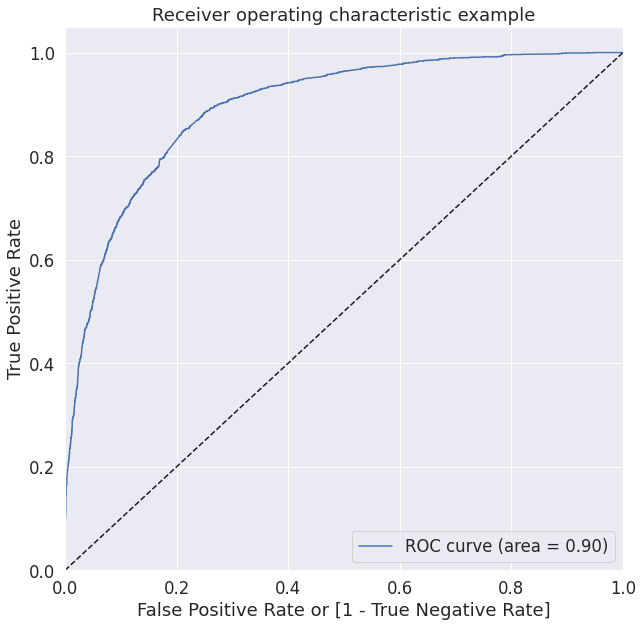

In [ ]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Convert  Convert_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0        0      0.073445    3009          0    1    0    0    0    0    0   
1        0      0.120574    1012          0    1    1    0    0    0    0   
2        0      0.316125    9226          0    1    1    1    1    0    0   
3        1      0.697702    4750          1    1    1    1    1    1    1   
4        1      0.721164    7987          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    1    0    0    0  
4    1    1    0    0

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.621792  0.977514  0.398976
0.2   0.2  0.770430  0.919052  0.677337
0.3   0.3  0.801921  0.879395  0.753393
0.4   0.4  0.813258  0.774325  0.837644
0.5   0.5  0.816407  0.702371  0.887836
0.6   0.6  0.810581  0.637367  0.919078
0.7   0.7  0.786175  0.528618  0.947503
0.8   0.8  0.766966  0.448896  0.966197
0.9   0.9  0.717525  0.287817  0.986684


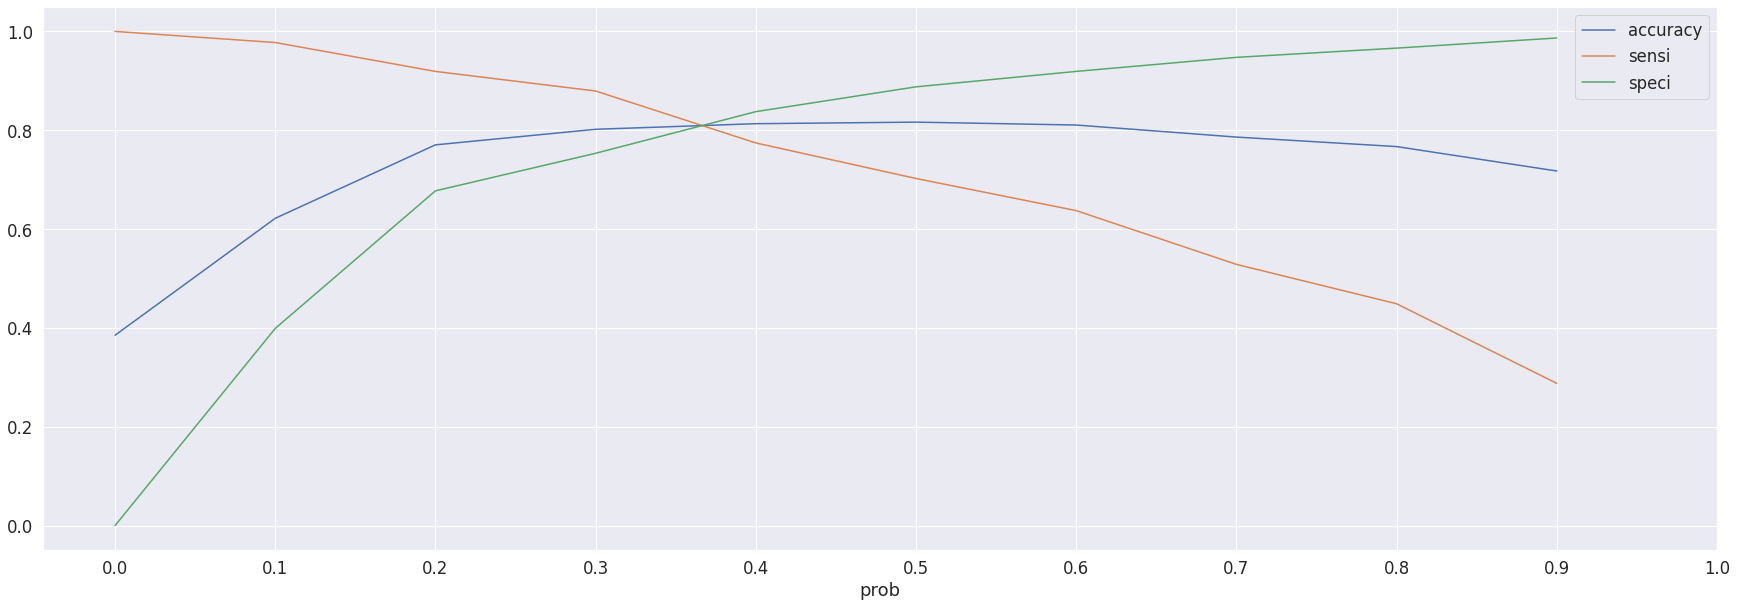

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(30,10)).set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

Convert  Convert_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0        0      0.073445    3009          0    1    0    0    0    0    0   
1        0      0.120574    1012          0    1    1    0    0    0    0   
2        0      0.316125    9226          0    1    1    1    1    0    0   
3        1      0.697702    4750          1    1    1    1    1    1    1   
4        1      0.721164    7987          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    1    0    0    0                1  
4    1    1    0    0                1

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.8129428436466698

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3208,  697],
       [ 491, 1955]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7992641046606704

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8215108834827145

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17848911651728552


In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7371794871794872


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8672614220059476


## Precision and Recall

In [ ]:
#Looking at the confusion matrix again

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
confusion

array([[3467,  438],
       [ 728, 1718]])

##### Precision
TP / TP + FP

In [ ]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7968460111317254

##### Recall
TP / TP + FN

In [ ]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7023712183156173

Using sklearn utilities for the same

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_pred_final.Convert, y_train_pred_final.predicted)

0.7968460111317254

In [ ]:
recall_score(y_train_pred_final.Convert, y_train_pred_final.predicted)

0.7023712183156173

### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Convert, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Convert, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

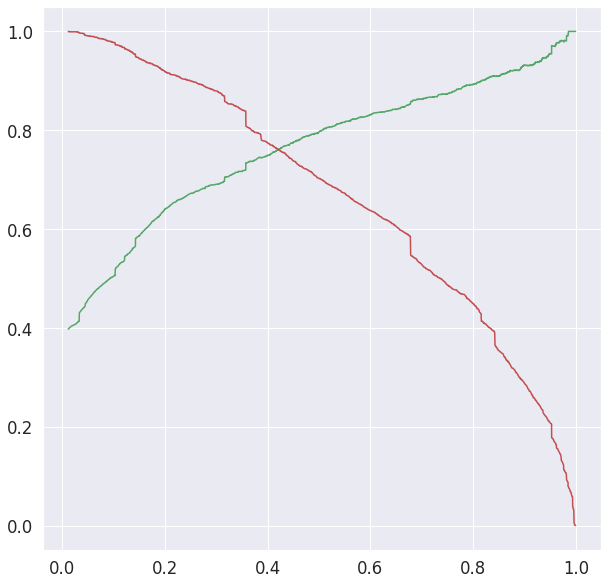

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [ ]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Add Form  \
3271             0                    -0.600595              0   
1490             0                     1.887326              0   
7936             0                    -0.752879              0   
4216             0                    -0.888650              1   
3830             0                    -0.587751              0   

      Occupation_Working Professional  Matters_Better Career Prospects  \
3271                                0                                0   
1490                                1                                1   
7936                                0                                0   
4216                                0                                1   
3830                                0                                0   

      Source_Direct Traffic  Source_Google  Source_Organic Search  \
3271                      0              1                      0   
1490                      1              0                      0   
7936                      0              1                      0   
4216                      0              0                      0   
3830                      0              0                      1   

      Source_Referral Sites  Source_Welingak Website  Email Link Clicked  \
3271                      0                        0                   0   
1490                      0                        0                   0   
7936                      0                        0                   0   
4216                      0                        0                   0   
3830                      0                        0                   0   

      Email Opened  Modified  Olark Chat Conversation  \
3271             1         0                        0   
1490             1         0                        0   
7936             1         0                        0   
4216             0         1                        0   
3830             1         0                        0   

      Page Visited on Website  Activity_Converted to Lead  \
3271                        0                           0   
1490                        0                           0   
7936                        0                           0   
4216                        0                           0   
3830                        0                           0   

      Activity_Email Bounced  Activity_Olark Chat Conversation  \
3271                       0                                 0   
1490                       0                                 0   
7936                       0                                 0   
4216                       0                                 0   
3830                       0                                 0   

      Activity_Page Visited on Website  
3271                                 0  
1490                                 0  
7936                                 0  
4216                                 0  
3830                                 0

In [ ]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

3271    0.067599
1490    0.970017
7936    0.057511
4216    0.815666
3830    0.054919
1800    0.711235
6507    0.463393
4821    0.323638
4223    0.952710
4714    0.121579
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

0
3271  0.067599
1490  0.970017
7936  0.057511
4216  0.815666
3830  0.054919

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

Converted  CustID         0
0          0    3271  0.067599
1          1    1490  0.970017
2          0    7936  0.057511
3          1    4216  0.815666
4          0    3830  0.054919

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  CustID  Convert_Prob
0          0    3271      0.067599
1          1    1490      0.970017
2          0    7936      0.057511
3          1    4216      0.815666
4          0    3830      0.054919

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Convert_Prob'], axis='columns')

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  Converted  Convert_Prob
0    3271          0      0.067599
1    1490          1      0.970017
2    7936          0      0.057511
3    4216          1      0.815666
4    3830          0      0.054919

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [ ]:
y_pred_final.head()

CustID  Converted  Convert_Prob  final_predicted
0    3271          0      0.067599                0
1    1490          1      0.970017                1
2    7936          0      0.057511                0
3    4216          1      0.815666                1
4    3830          0      0.054919                0

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8097686375321337

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1426,  308],
       [ 210,  779]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7876643073811931

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8223760092272203

In [ ]:
#Taking threshold from Precision and Recall we have


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [ ]:
y_pred_final.head()

CustID  Converted  Convert_Prob  final_predicted
0    3271          0      0.067599                0
1    1490          1      0.970017                1
2    7936          0      0.057511                0
3    4216          1      0.815666                1
4    3830          0      0.054919                0

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8149100257069408

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1475,  259],
       [ 245,  744]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7522750252780587

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.850634371395617

**WE TAKE res MODEL AS OUR MODEL AND ASSIGN A THRESHOLD VALUE OF 0.42**

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2526.7
Date:                Mon, 27 Feb 2023   Deviance:                       5053.5
Time:                        12:02:07   Pearson chi2:                 6.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.5441      0.125      4.342      0.000       0.298       0.790
Do Not Email                        -1.5409      0.203     -7.586      0.000      -1.939      -1.143
Total Time Spent on Website          1.1320      0.041     27.304      0.000       1.051       1.213
Lead Add Form                        2.2589      0.228      9.915      0.000       1.812       2.705
Occupation_Working Professional      2.4879      0.192     12.970      0.000       2.112       2.864
Matters_Better Career Prospects      1.2059      0.089     13.520      0.000       1.031       1.381
Source_Direct Traffic               -1.5680      0.120    -13.067      0.000      -1.803      -1.333
Source_Google                       -1.1587      0.114    -10.198      0.000      -1.381      -0.936
Source_Organic Search               -1.3945      0.138    -10.086      0.000      -1.665      -1.124
Source_Referral Sites               -1.4950      0.355     -4.208      0.000      -2.191      -0.799
Source_Welingak Website              2.0295      0.753      2.696      0.007       0.554       3.505
Email Link Clicked                  -1.6954      0.259     -6.534      0.000      -2.204      -1.187
Email Opened                        -1.3297      0.090    -14.829      0.000      -1.505      -1.154
Modified                            -1.5157      0.107    -14.116      0.000      -1.726      -1.305
Olark Chat Conversation             -1.2016      0.381     -3.150      0.002      -1.949      -0.454
Page Visited on Website             -1.0189      0.303     -3.363      0.001      -1.613      -0.425
Activity_Converted to Lead          -1.2112      0.235     -5.149      0.000      -1.672      -0.750
Activity_Email Bounced              -1.2989      0.424     -3.062      0.002      -2.130      -0.468
Activity_Olark Chat Conversation    -1.3893      0.197     -7.054      0.000      -1.775      -1.003
Activity_Page Visited on Website    -0.5571      0.222     -2.506      0.012      -0.993      -0.121
====================================================================================================
"""